In [3]:
import pandas as pd, numpy as np, math, glob, os, cv2, matplotlib.pyplot as plt
import csv, cv2, numpy as np, pandas as pd, matplotlib.pyplot as plt, string, PIL, keras, pymysql
from sklearn.feature_extraction.image import extract_patches_2d
import collections, time, pickle, glob, os, cv2, os.path, math
from keras.models import load_model,model_from_json
from collections import OrderedDict, Counter
from skimage.transform import resize
from sklearn.externals import joblib
from sklearn import preprocessing
from skimage.feature import hog
from fuzzywuzzy import process
from scipy.stats import boxcox
from PIL import ImageEnhance
from fuzzywuzzy import fuzz
from pandasql import sqldf
from scipy import ndimage
from PIL import Image
from os import walk
#import MySQLdb
import fuzzywuzzy
import warnings
warnings.filterwarnings('ignore')

/root/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


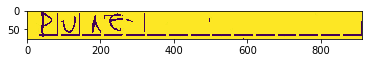

912
137


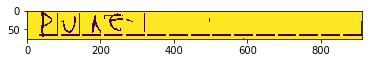

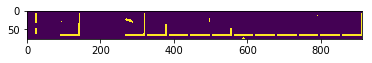

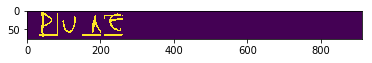

71 3 23


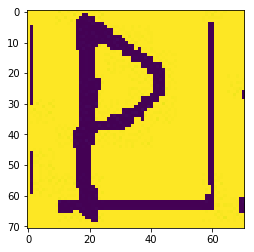

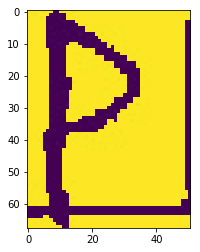

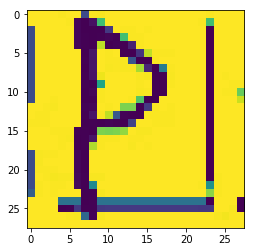

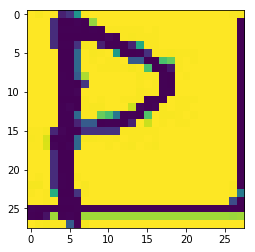

str [17]
47 14 91


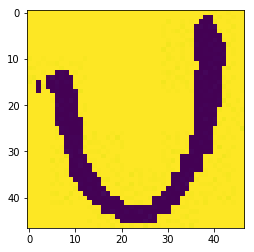

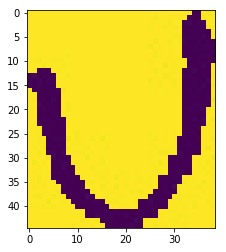

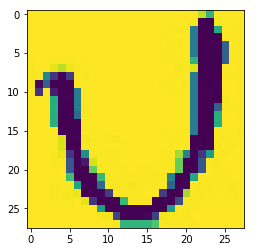

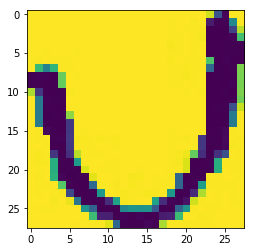

str [20]
1 66 119


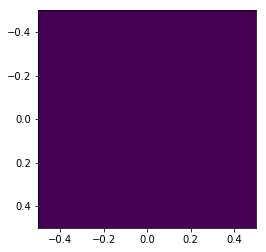

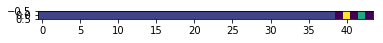

57 13 148


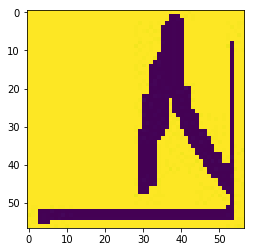

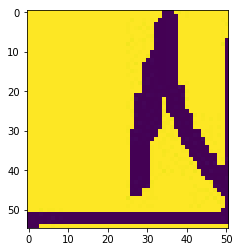

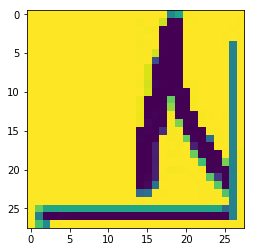

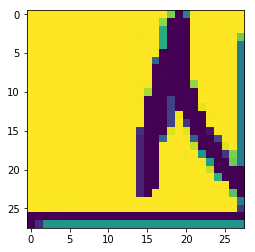

str [1]
65 6 203


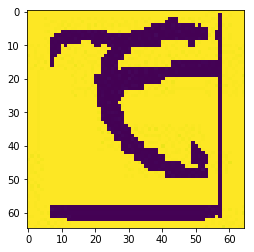

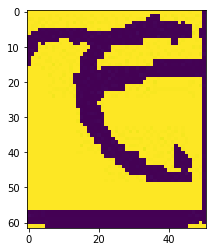

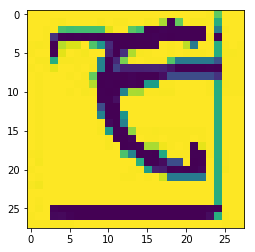

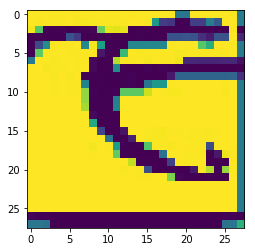

str [4]
1 66 356


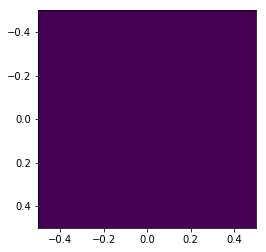

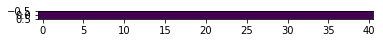

1 66 462


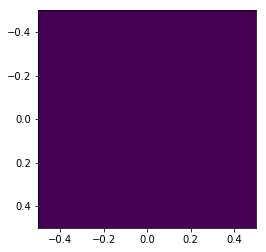

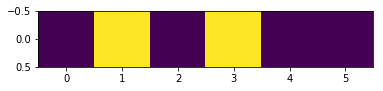

1 66 484


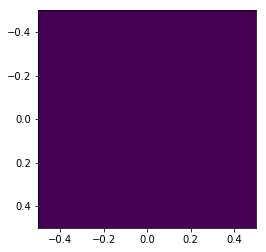

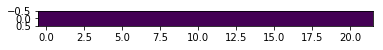

1 66 596


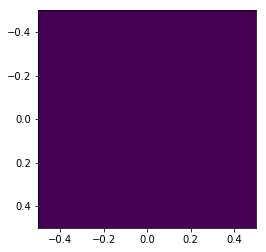

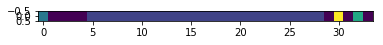

1 66 627


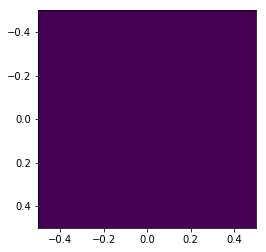

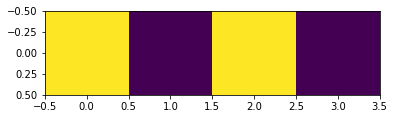

1 66 717


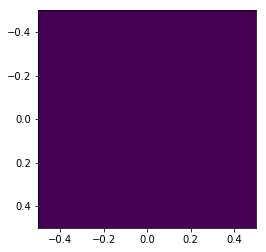

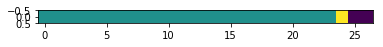

1 66 745


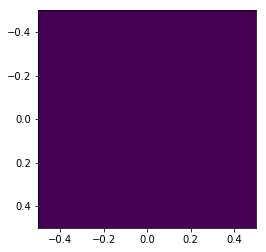

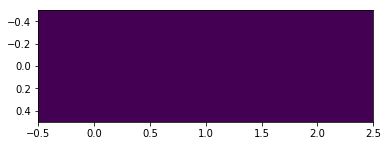

1 66 836


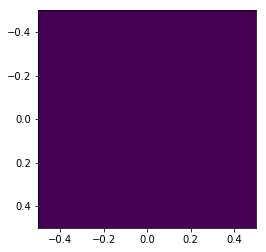

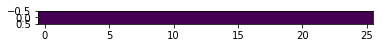

1 66 866


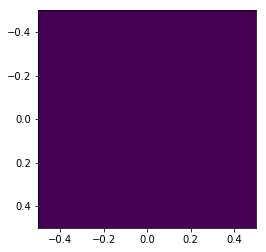

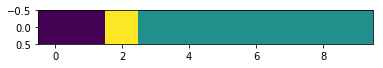

'R UBE'

In [90]:
character_extraction('/home/Sandeep/something1.jpg', dico, model_char)

In [790]:
def character_extraction(character_file, dico, model_char):
    im = cv2.imread(character_file,0)
    
    if im is not None:
        im1=im.copy()
        plt.imshow(im1)
        plt.show()
        #blur=cv2.GaussianBlur(im1,(13,13),0)
        
        #Thresholding Image
        ref = cv2.threshold(im1, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        #print('ref',ref)
        mask = np.zeros_like(ref)
#         plt.imshow(mask)
#         plt.show()
        #print('mask',mask)
        w = ref.shape[1]
        #print(w)
        shp = round(w * 0.15)
        #print(shp)
        if shp % 2 == 0:
            
            shp = shp + 1
            #print(shp)

        kr = cv2.getStructuringElement(cv2.MORPH_RECT,(shp,1))
        er = cv2.erode(ref, kr, 1)
        kr = cv2.getStructuringElement(cv2.MORPH_RECT,(shp,1))
        dl = cv2.dilate(er, kr, 1)
        OriImg2 = im.copy()
        img = dl
        OrimgCopy = dl
        added= cv2.add(cv2.bitwise_not(ref), dl)
#         plt.imshow(added)
#         plt.show()
        
        (_, cnts, _) = cv2.findContours(cv2.bitwise_not(added).copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        cnts1 = [c for c in cnts if cv2.contourArea(c) < round(w*0.20)]    
        for c in cnts1:
            cv2.drawContours(mask, [c], -1, 255, 2)
        plt.imshow(mask)
        plt.show()
        img_output = cv2.bitwise_not(cv2.add(added,mask))
        plt.imshow(img_output)
        plt.show()

    
        # For finding the contours
        
        img,ctrs,hier = cv2.findContours(img_output.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE )
        
        #Contour Area
        #print(ctrs)
        
#         areas = [cv2.contourArea(ctr) for ctr in ctrs]
#         mean = np.mean(areas)
#         x = 0
#         i = []
        
        
#         # For Contour Area 
        
#         for area in areas:
#             if area < (0.50 * mean):
#                 i.extend([x])
#                 x=x+1
#             else:
#                 x=x+1
        
#         print(area)
        # Finding bounding rectangles 
        
        rects = [cv2.boundingRect(ctr) for ctr in ctrs]
        #print("rects", rects)

        # Making it into an ARRAY
        rect2 = np.array(rects, 'int')
        #print("rect2", rect2.shape)
        col = 0
    
        # Sorting the list
        
        try:
            rect2 = rect2[np.argsort(rect2[:,col])]
        except IndexError:
            rect2 = rects
            
        #print(rect2)
        li = []
        s=""
#         plt.imshow(rect2)
#         plt.show()
        O_copy = OriImg2.copy()
        d={}
        cnt = 0
        
        # For drawing the rectangle 
        
        for j,rect in enumerate(rect2):
            leng = int(rect[3] * 1.05)
            pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
            pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
            #print(leng,pt1,pt2)
            roi = OriImg2[pt1:pt1+leng, pt2:pt2+leng]
#             plt.imshow(roi)
#             plt.show()
            newroi=OriImg2[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]
#             plt.imshow(newroi)
#             plt.show()
            a_str=''
            if roi.shape[0] >= 28 and roi.shape[1] >= 28:
                roi = cv2.resize(roi, (28, 28), cv2.INTER_AREA)
                newroi = cv2.resize(newroi, (28, 28), cv2.INTER_AREA)
#                 plt.imshow(roi)
#                 plt.show()
#                 plt.imshow(newroi)
#                 plt.show()
                ret1, im_th1 = cv2.threshold(roi, 190, 255, cv2.THRESH_BINARY)
                img = im_th1.astype('float32')
                img = resize(img, (28,28), order=1, preserve_range=True)
                img = img/255
                img = resize(ones_padding(img), (28,28), order=1, preserve_range=True)
                img = img.reshape((1,28,28,1))

                a_str = model_char.predict_classes(img)
                #print('str',a_str)
                a_str = string.ascii_uppercase[a_str[0]]
                #print(a_str)
                d[cnt] = rect[0]
                cnt=cnt+1
#             print('d', d)
            s += str(a_str)
        data=['Path','Character','Image_Name','Prediction']
        with open('/home/Sandeep/name.csv','a',newline='') as f:
            writer=csv.writer(f,delimiter=',')
            writer.writerow([image_path.split('/')[4].split('.')[0],image_path.split('/')[5].split('.')[0],image_path.split('/')[6].split('.')[0],s])
            f.close()
        x = list(d.values())
        if (len(x)>=3):
            y=[x[i+1]-x[i] for i in range(len(x)-1)]
            s1 = s[0:(np.argmax(y)+1)]+' '+s[(np.argmax(y)+1):]    
        else:
            s1 = s
        return s1


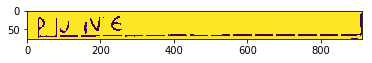

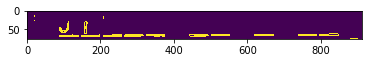

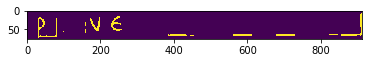

'/root/bagic_grid'

In [792]:
character_extraction('/home/Sandeep/something1.jpg', dico, model_char)
os.getcwd()

89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_With

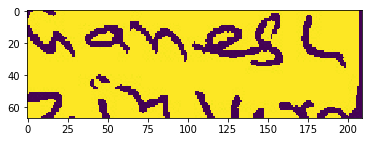

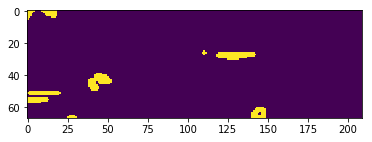

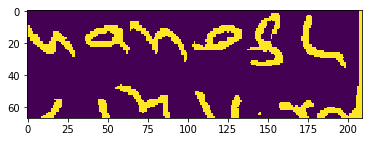

GL
89367116_WithoutGrid


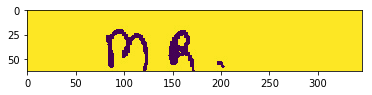

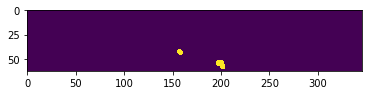

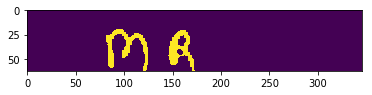

MR
89367116_WithoutGrid


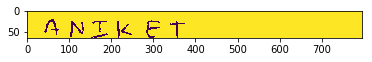

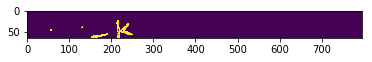

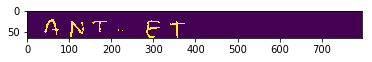

ANT ET
89367116_WithoutGrid


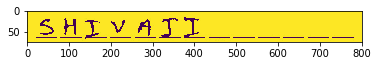

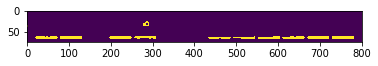

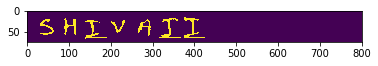

SHEV AJI
89367116_WithoutGrid


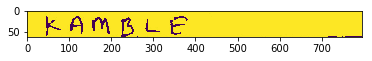

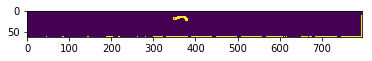

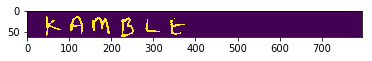

KAM BLK
89367116_WithoutGrid


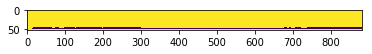

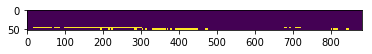

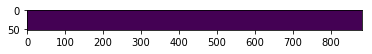


89367116_WithoutGrid


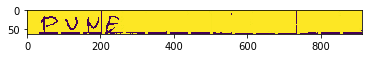

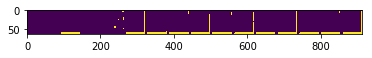

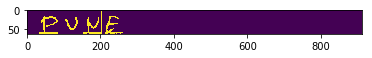

B UWE
89367116_WithoutGrid


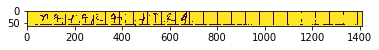

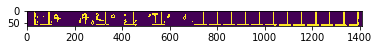

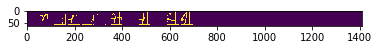

NA
89367116_WithoutGrid


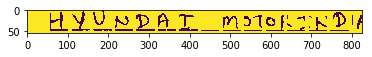

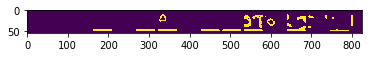

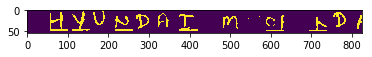

YYUYDAI MWBD
89367116_WithoutGrid


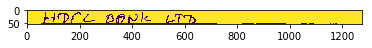

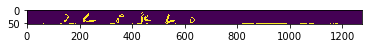

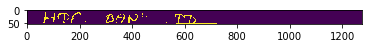

HDEDH Y
89367116_WithoutGrid


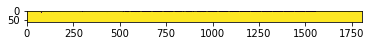

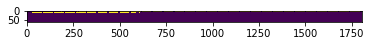

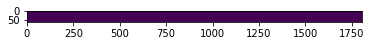


89367116_WithoutGrid


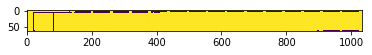

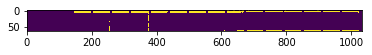

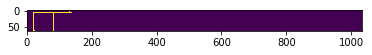

T
89367116_WithoutGrid


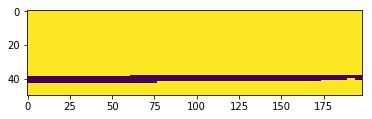

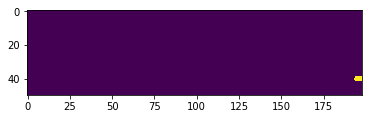

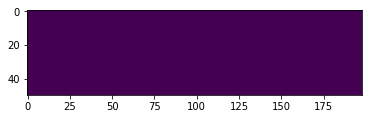


89367116_WithoutGrid


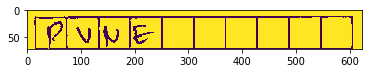

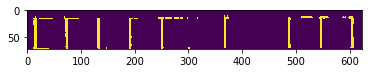

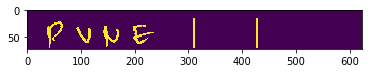

PVNEI J
89367116_WithoutGrid


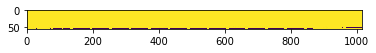

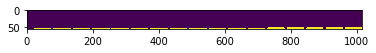

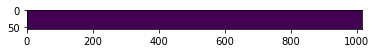


89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
89367116_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_Wit

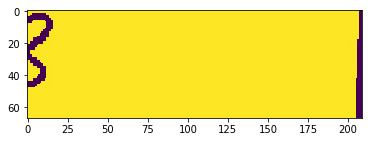

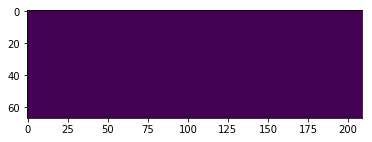

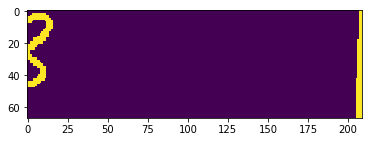


87395726_WithoutGrid


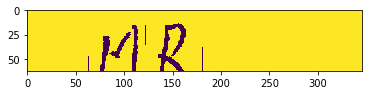

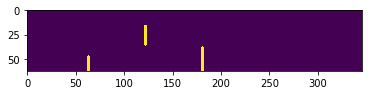

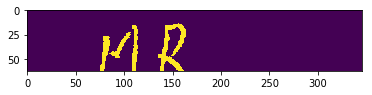

HWM D
87395726_WithoutGrid


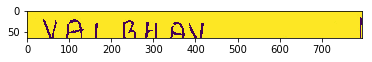

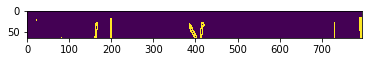

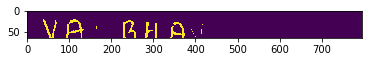

VA BHYA
87395726_WithoutGrid


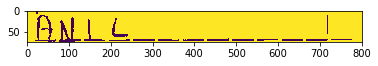

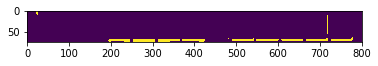

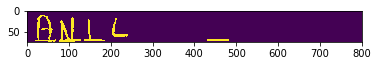

BUL L
87395726_WithoutGrid


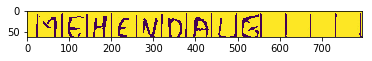

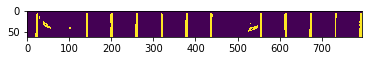

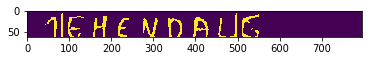

GMEHEND ALVG
87395726_WithoutGrid


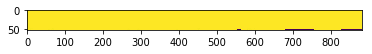

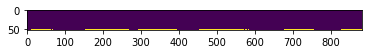

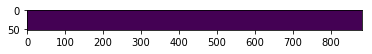


87395726_WithoutGrid


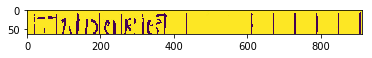

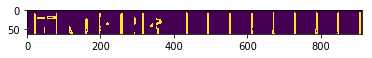

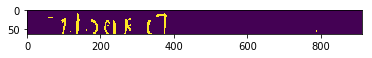

QWYGWK KG
87395726_WithoutGrid


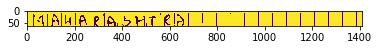

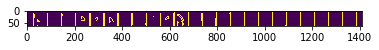

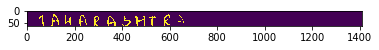

JAHA PASHTRJ
87395726_WithoutGrid


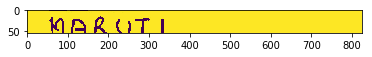

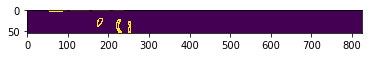

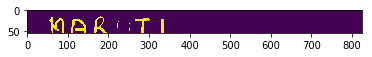

MQR TI
87395726_WithoutGrid


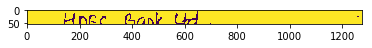

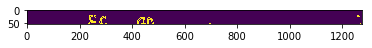

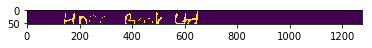

HM RUHD
87395726_WithoutGrid


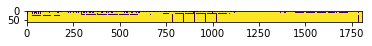

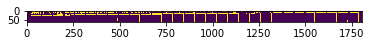

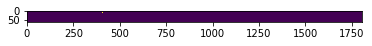


87395726_WithoutGrid


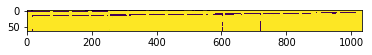

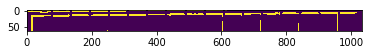

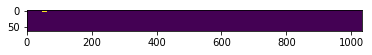


87395726_WithoutGrid


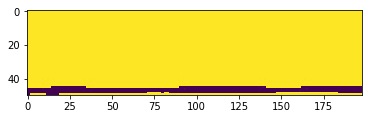

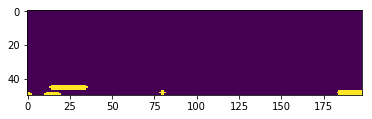

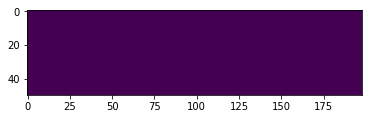


87395726_WithoutGrid


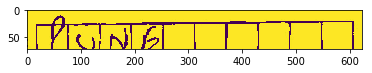

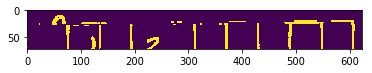

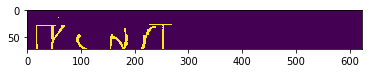

P CNGJ
87395726_WithoutGrid


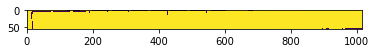

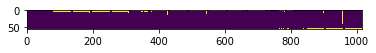

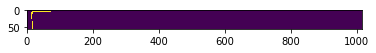

T
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87395726_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_Wi

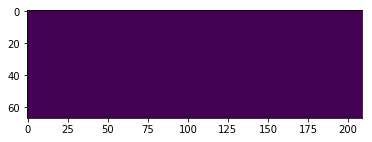

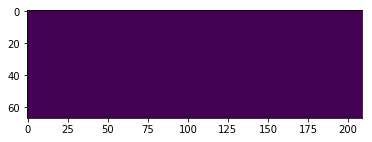

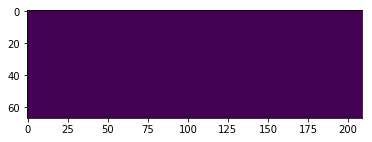


87609947_WithoutGrid


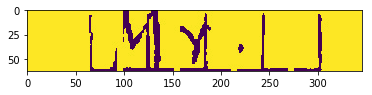

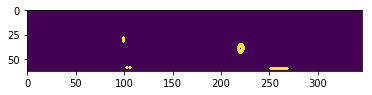

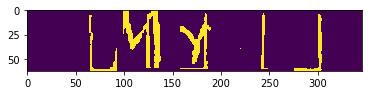

L YJJ
87609947_WithoutGrid


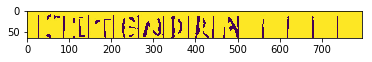

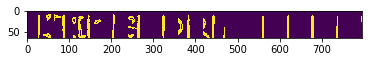

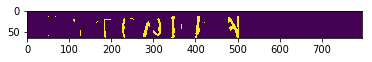

TUAWWH Y
87609947_WithoutGrid


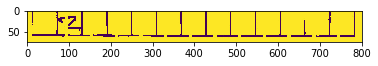

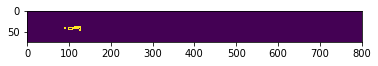

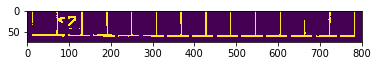


87609947_WithoutGrid


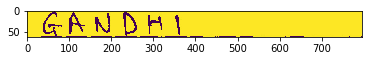

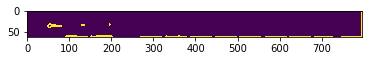

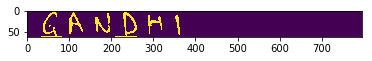

GAND HI
87609947_WithoutGrid


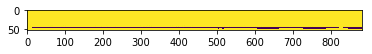

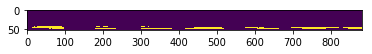

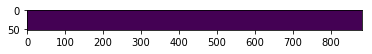


87609947_WithoutGrid


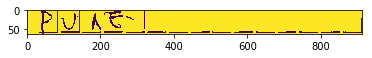

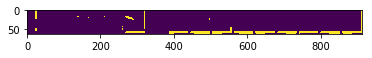

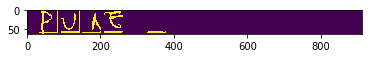

VBE L
87609947_WithoutGrid


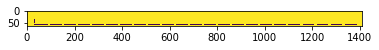

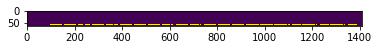

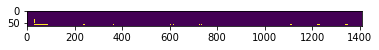


87609947_WithoutGrid


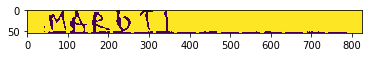

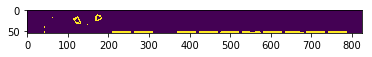

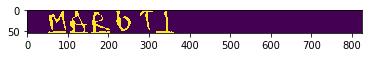

MAB I
87609947_WithoutGrid


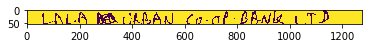

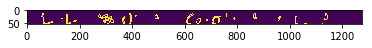

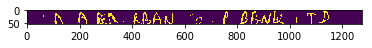

AAA LAANOPBANKT
87609947_WithoutGrid


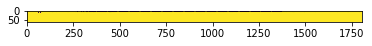

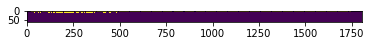

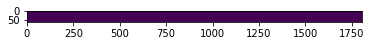


87609947_WithoutGrid


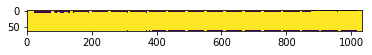

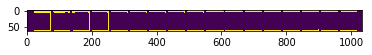

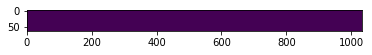


87609947_WithoutGrid


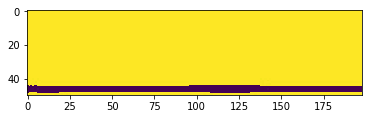

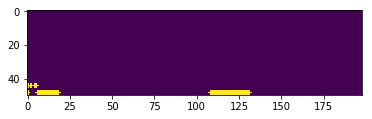

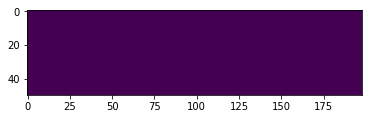


87609947_WithoutGrid


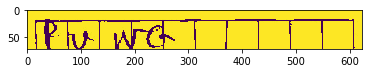

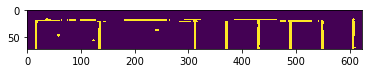

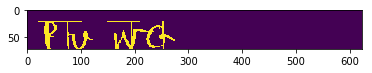

MM
87609947_WithoutGrid


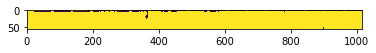

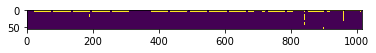

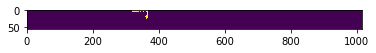


87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
87609947_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_Wit

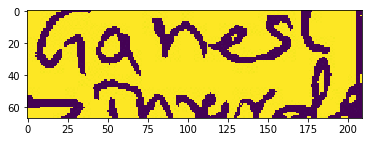

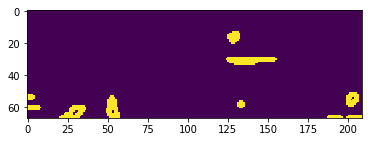

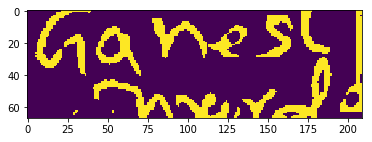

GA J
89453024_WithoutGrid


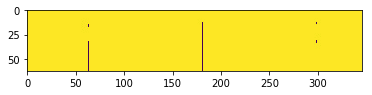

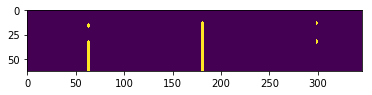

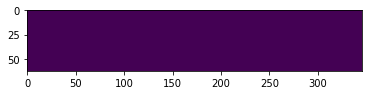


89453024_WithoutGrid


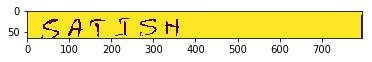

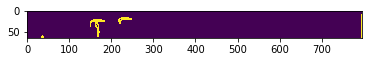

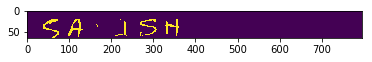

SA USH
89453024_WithoutGrid


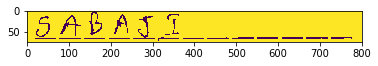

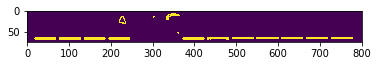

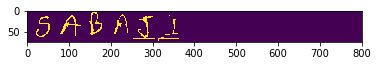

GABRAJ Y
89453024_WithoutGrid


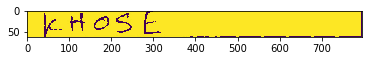

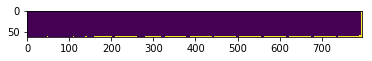

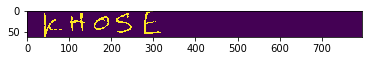

K HCS
89453024_WithoutGrid


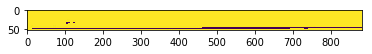

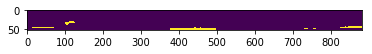

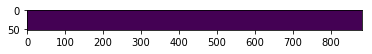


89453024_WithoutGrid


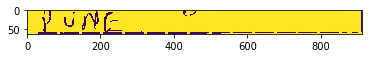

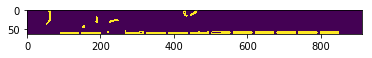

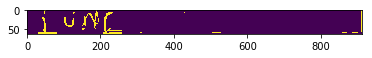

VN E
89453024_WithoutGrid


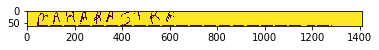

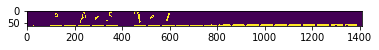

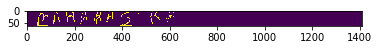

MRAHA AS
89453024_WithoutGrid


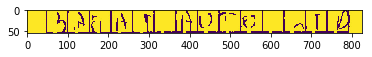

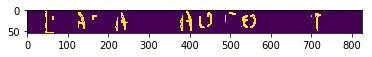

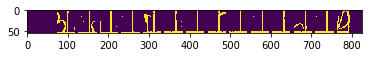

BUWHIJUJB ID
89453024_WithoutGrid


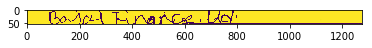

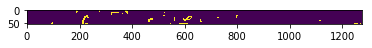

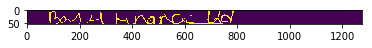

D WYVE
89453024_WithoutGrid


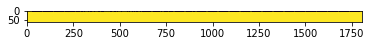

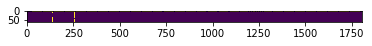

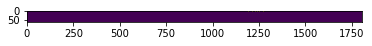


89453024_WithoutGrid


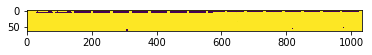

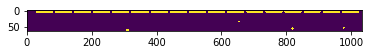

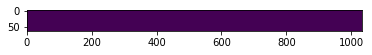


89453024_WithoutGrid


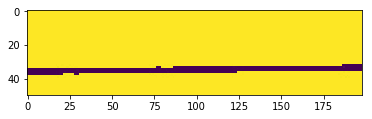

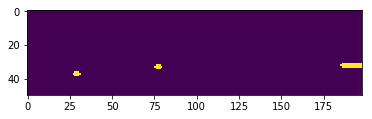

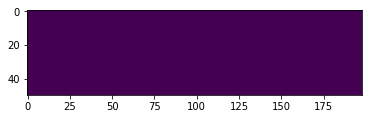


89453024_WithoutGrid


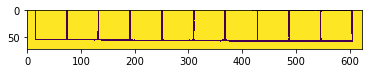

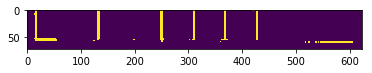

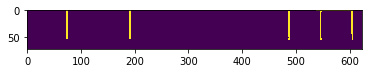

I
89453024_WithoutGrid


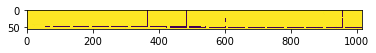

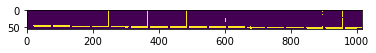

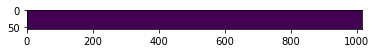


89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
89453024_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_Wit

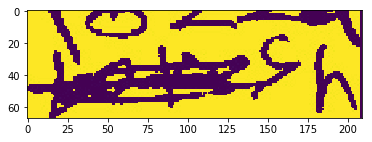

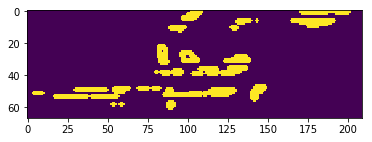

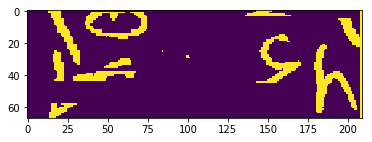

J SH
88055134_WithoutGrid


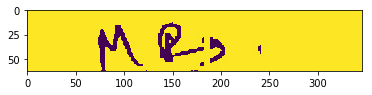

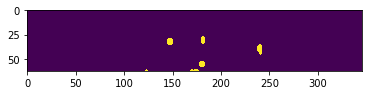

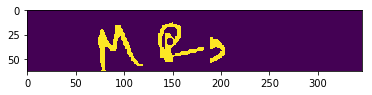

M ED
88055134_WithoutGrid


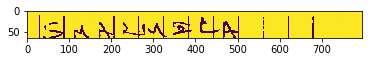

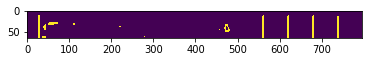

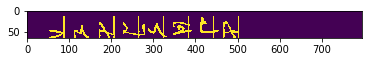

JWHWWD YA
88055134_WithoutGrid


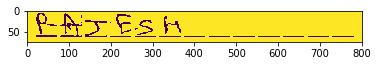

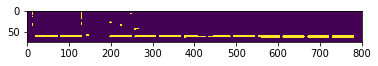

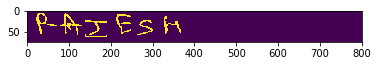

RAJ ESM
88055134_WithoutGrid


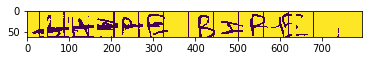

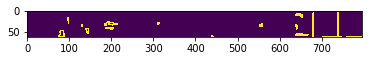

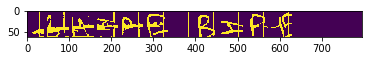

HADABJBD RF
88055134_WithoutGrid


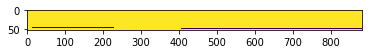

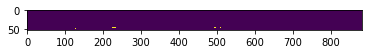

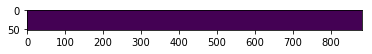


88055134_WithoutGrid


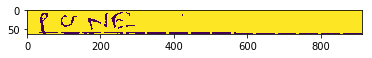

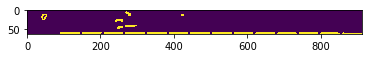

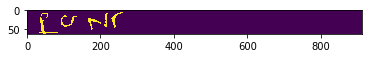

RJ RWF
88055134_WithoutGrid


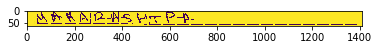

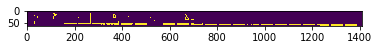

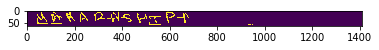

M UAASHJPT
88055134_WithoutGrid


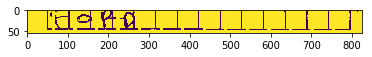

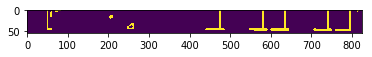

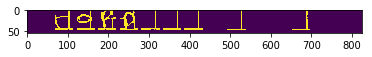


88055134_WithoutGrid


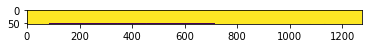

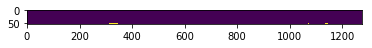

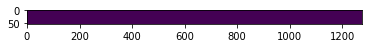


88055134_WithoutGrid


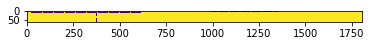

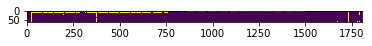

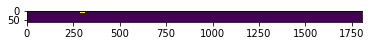


88055134_WithoutGrid


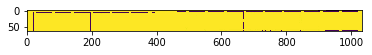

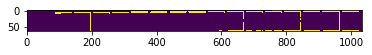

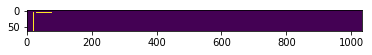

T
88055134_WithoutGrid


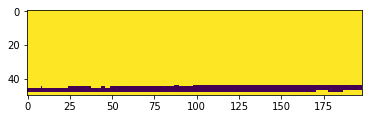

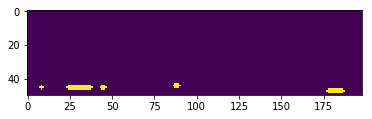

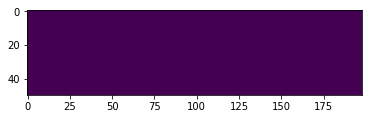


88055134_WithoutGrid


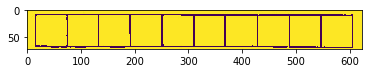

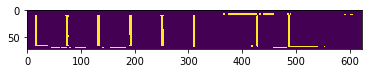

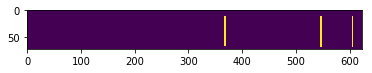

JD
88055134_WithoutGrid


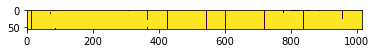

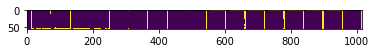

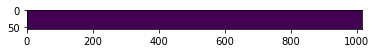


88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
88055134_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_Wit

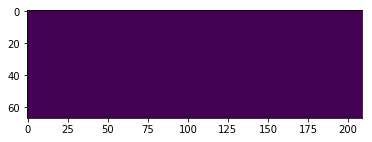

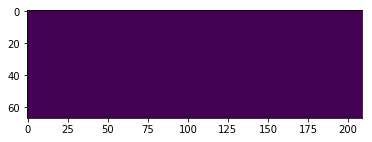

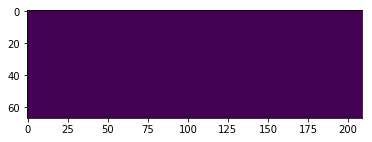


89547676_WithoutGrid


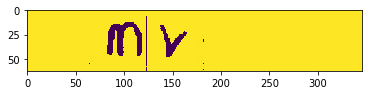

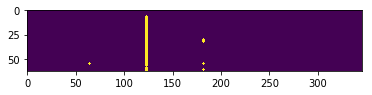

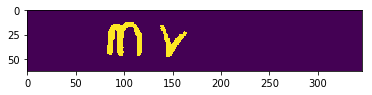

MV
89547676_WithoutGrid


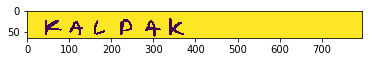

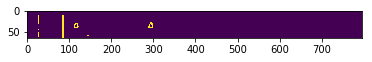

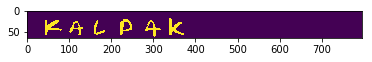

KAL PAK
89547676_WithoutGrid


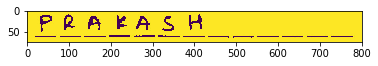

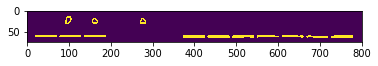

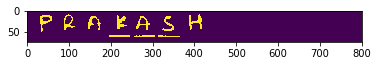

PRA KASH
89547676_WithoutGrid


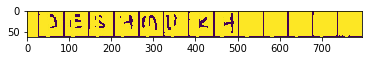

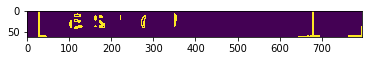

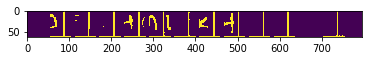

JUYWYUTWWERYHII I
89547676_WithoutGrid


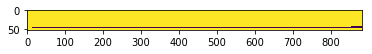

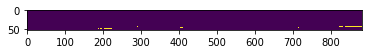

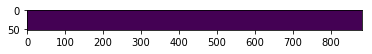


89547676_WithoutGrid


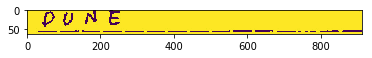

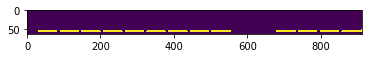

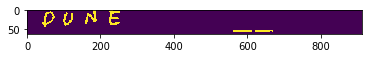

PUN E
89547676_WithoutGrid


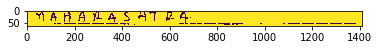

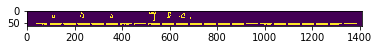

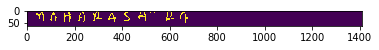

NAHARA SHTRA
89547676_WithoutGrid


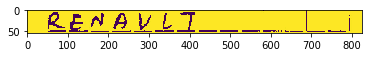

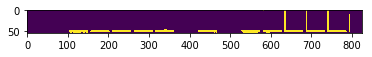

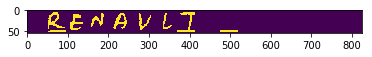

RENA VLJ
89547676_WithoutGrid


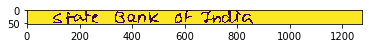

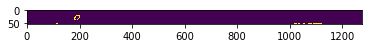

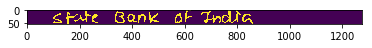

SAEBANKOH G
89547676_WithoutGrid


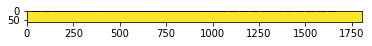

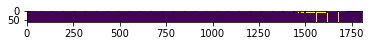

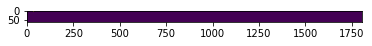


89547676_WithoutGrid


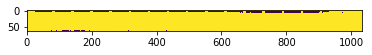

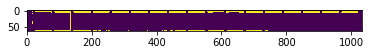

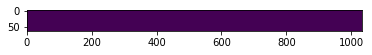


89547676_WithoutGrid


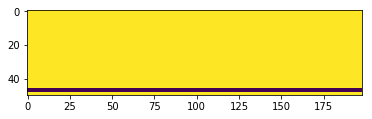

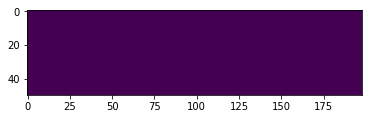

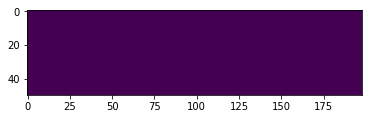


89547676_WithoutGrid


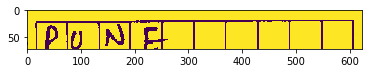

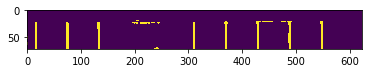

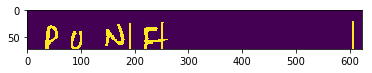

PONNF J
89547676_WithoutGrid


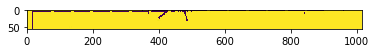

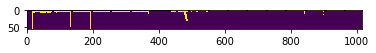

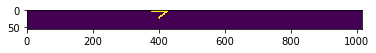


89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
89547676_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_Wit

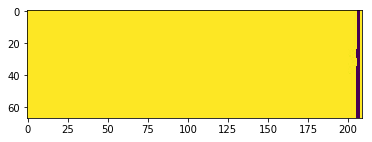

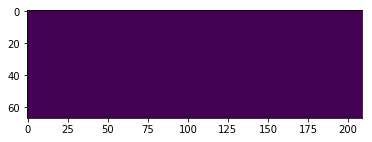

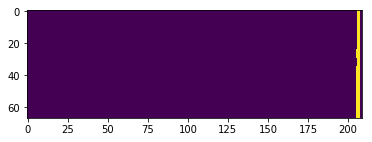


88103994_WithoutGrid


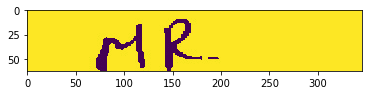

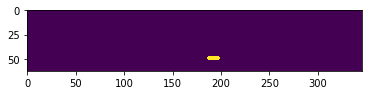

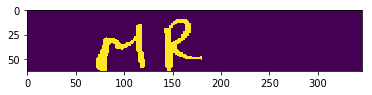

MR
88103994_WithoutGrid


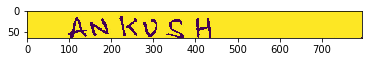

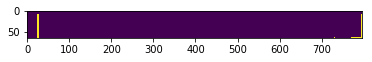

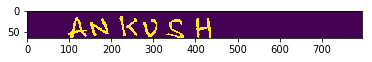

ANKKUS H
88103994_WithoutGrid


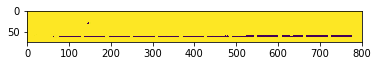

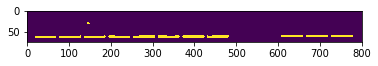

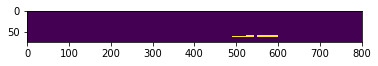


88103994_WithoutGrid


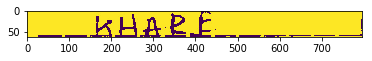

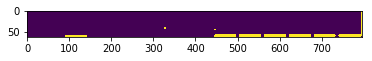

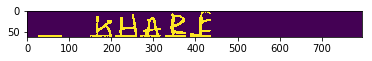

K HDRB
88103994_WithoutGrid


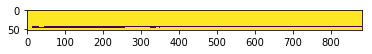

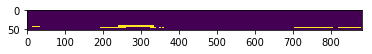

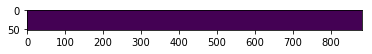


88103994_WithoutGrid


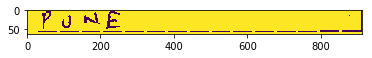

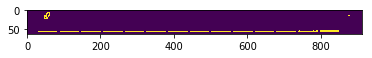

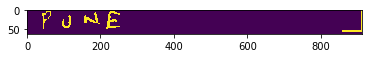

PU NE
88103994_WithoutGrid


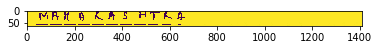

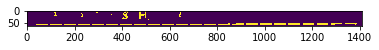

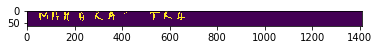

MANARA TKA
88103994_WithoutGrid


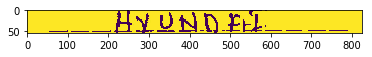

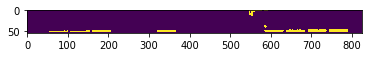

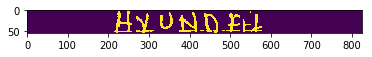

Y UNDFD
88103994_WithoutGrid


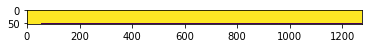

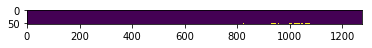

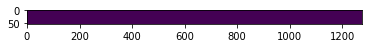


88103994_WithoutGrid


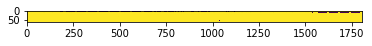

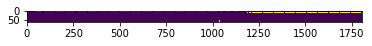

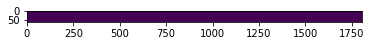


88103994_WithoutGrid


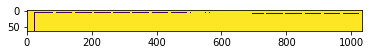

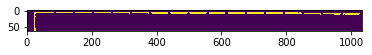

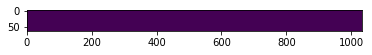


88103994_WithoutGrid


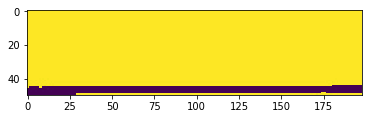

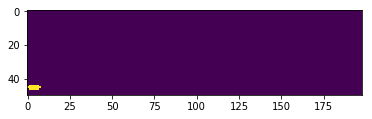

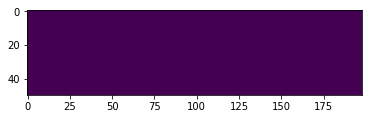


88103994_WithoutGrid


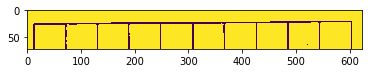

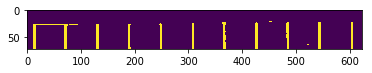

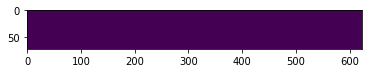


88103994_WithoutGrid


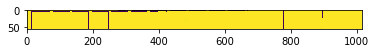

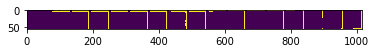

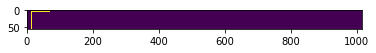

T
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
88103994_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_Wi

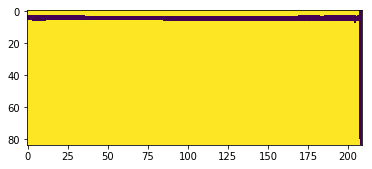

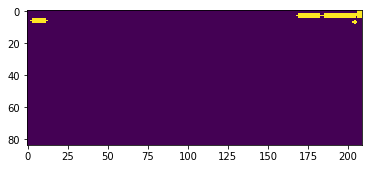

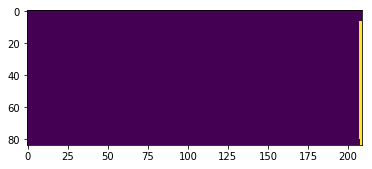

T
89574034_WithoutGrid


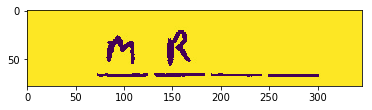

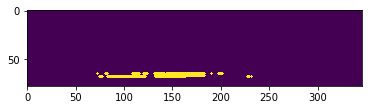

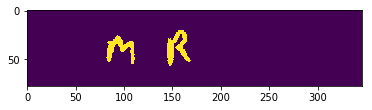

MR
89574034_WithoutGrid


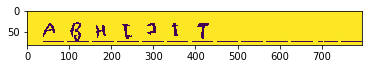

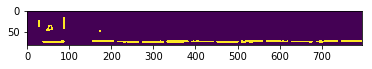

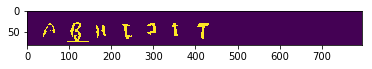

AB HHIJIT
89574034_WithoutGrid


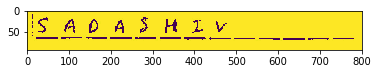

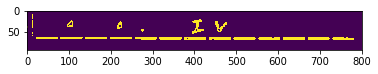

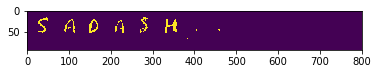

S ADASH
89574034_WithoutGrid


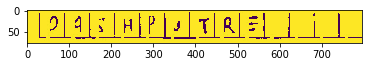

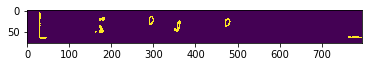

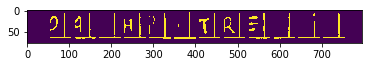

ZJ QQJWHUJITREEELIL
89574034_WithoutGrid


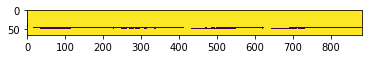

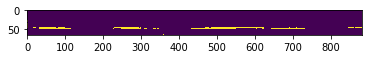

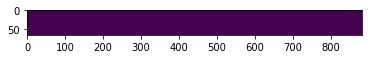


89574034_WithoutGrid


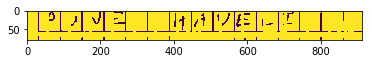

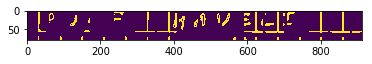

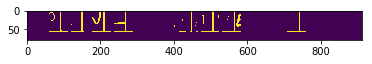

V QKJ
89574034_WithoutGrid


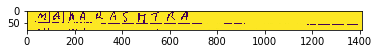

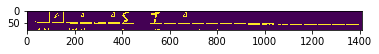

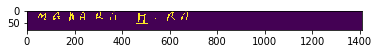

MANA HR
89574034_WithoutGrid


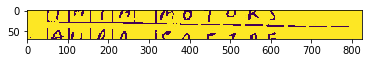

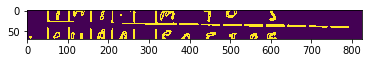

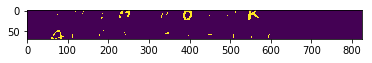


89574034_WithoutGrid


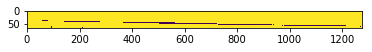

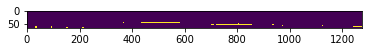

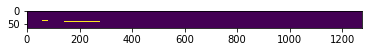


89574034_WithoutGrid


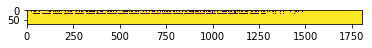

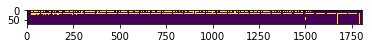

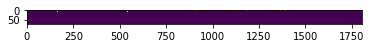


89574034_WithoutGrid


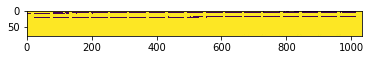

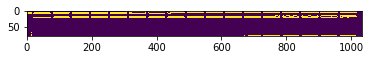

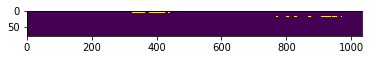


89574034_WithoutGrid


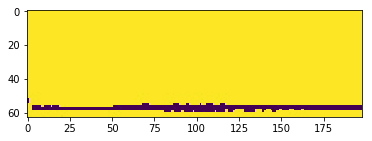

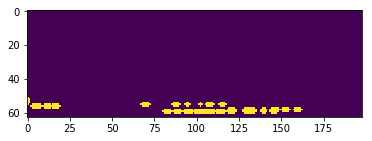

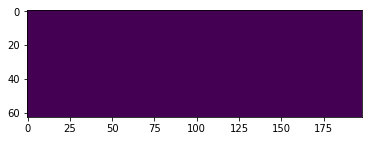


89574034_WithoutGrid


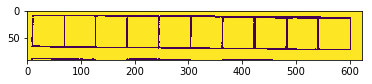

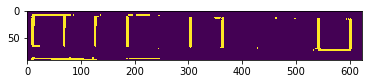

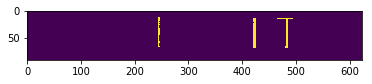

I JI
89574034_WithoutGrid


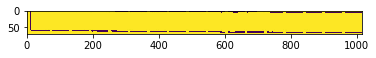

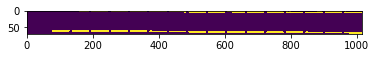

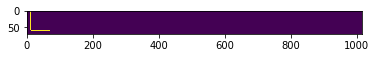


89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
89574034_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_Wit

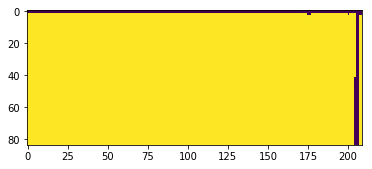

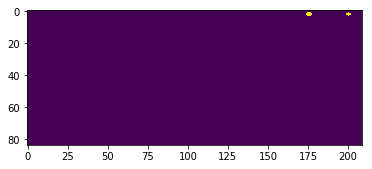

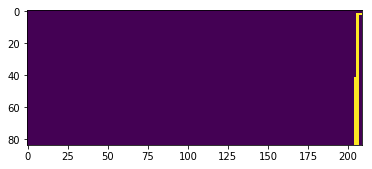

T
88199648_WithoutGrid


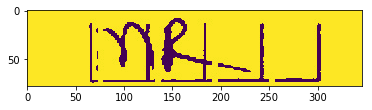

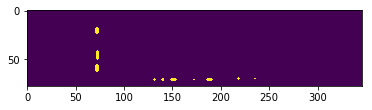

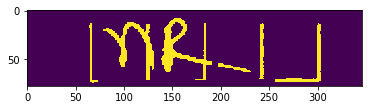

DNB JJ
88199648_WithoutGrid


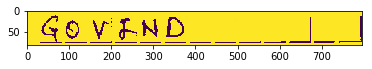

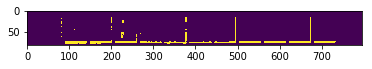

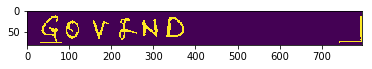

GOVAND L
88199648_WithoutGrid


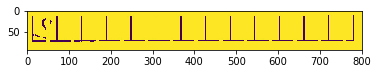

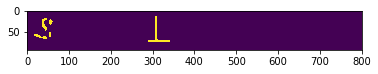

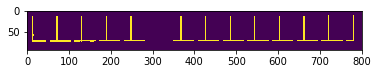

LLJL DILIILLJ
88199648_WithoutGrid


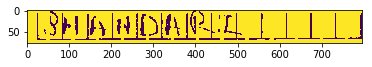

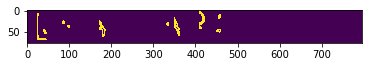

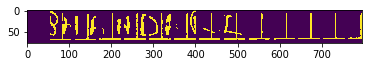

UG UUHWWUWDJYWBRGBJJIJJ
88199648_WithoutGrid


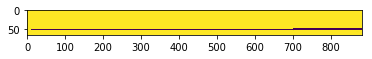

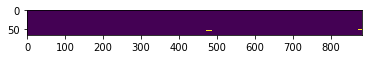

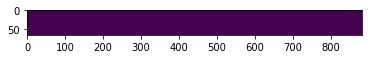


88199648_WithoutGrid


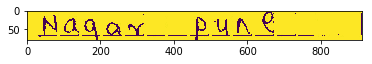

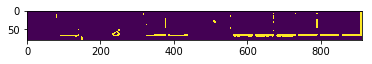

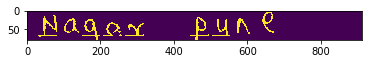

NAGQY BYNF
88199648_WithoutGrid


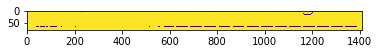

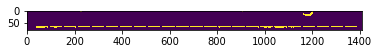

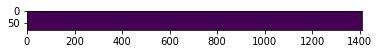


88199648_WithoutGrid


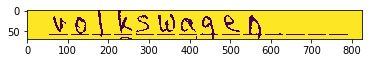

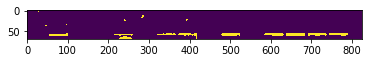

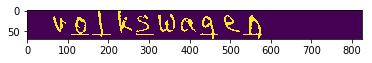

VQ SWAGED
88199648_WithoutGrid


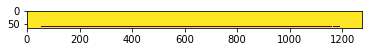

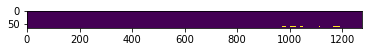

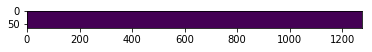


88199648_WithoutGrid


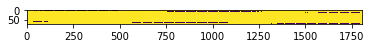

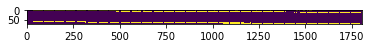

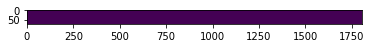


88199648_WithoutGrid


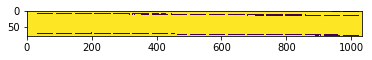

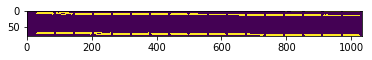

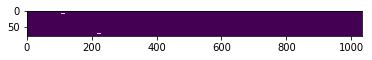


88199648_WithoutGrid


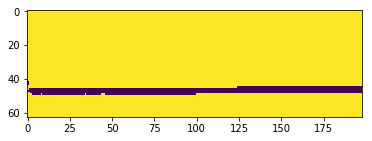

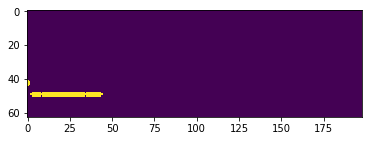

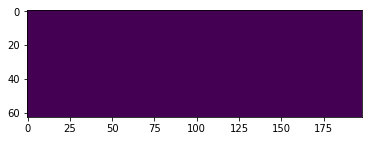


88199648_WithoutGrid


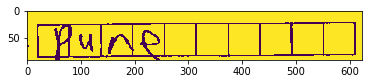

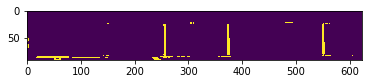

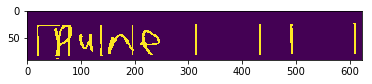

UBUWAPI JJJ
88199648_WithoutGrid


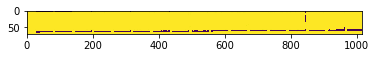

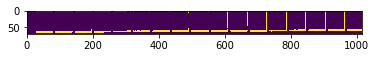

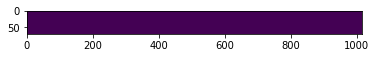


88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
88199648_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_Wit

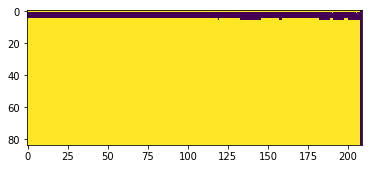

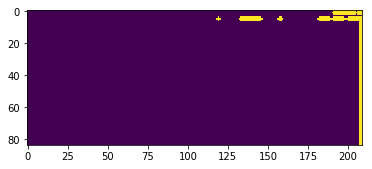

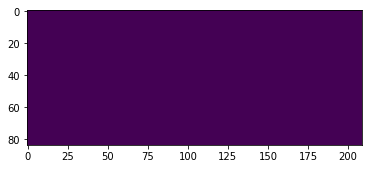


89643725_WithoutGrid


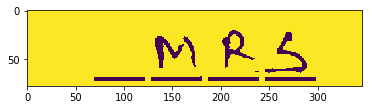

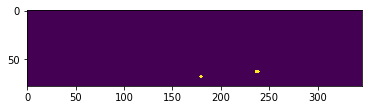

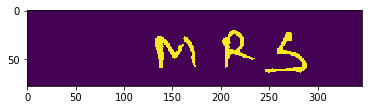

NNR S
89643725_WithoutGrid


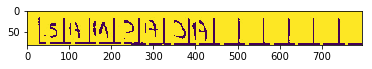

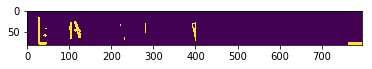

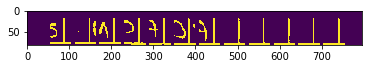

GS WMNNDZHIJYADJJJJI
89643725_WithoutGrid


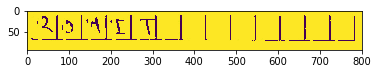

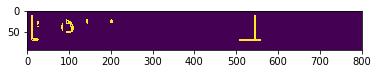

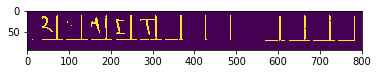

ZYJDUIDUJLJ JIIJ
89643725_WithoutGrid


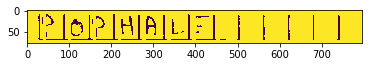

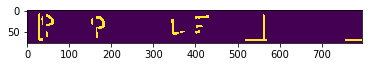

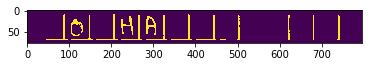

UOZZHNAMWJJ JIJ
89643725_WithoutGrid


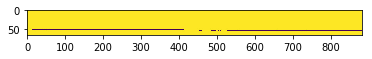

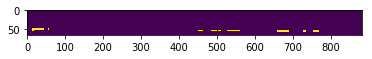

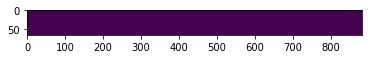


89643725_WithoutGrid


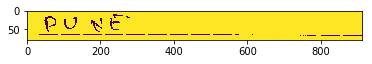

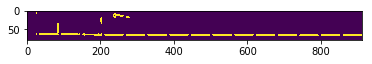

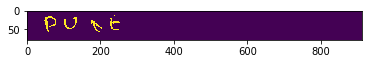

PU QK
89643725_WithoutGrid


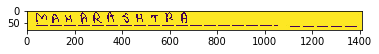

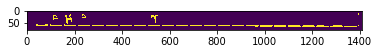

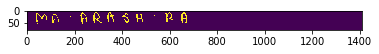

MAARASH RA
89643725_WithoutGrid


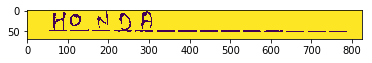

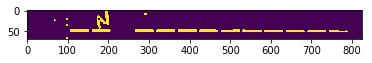

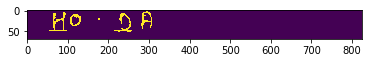

HO DA
89643725_WithoutGrid


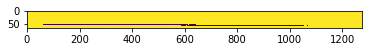

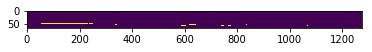

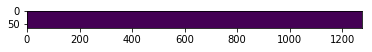


89643725_WithoutGrid


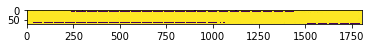

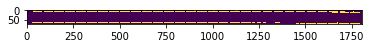

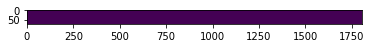


89643725_WithoutGrid


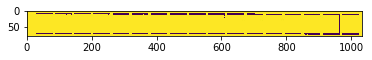

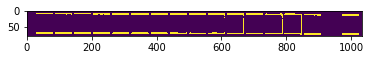

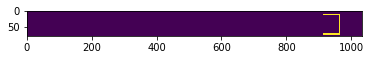

I
89643725_WithoutGrid


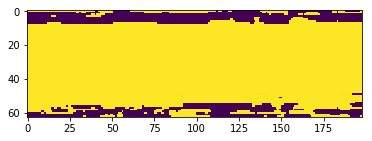

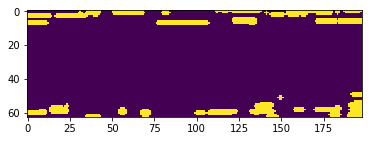

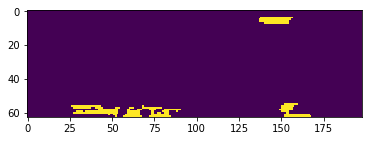


89643725_WithoutGrid


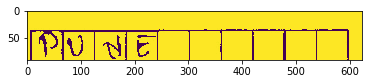

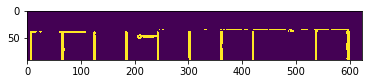

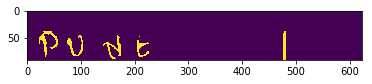

PUNE T
89643725_WithoutGrid


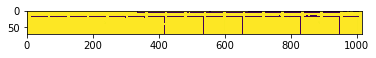

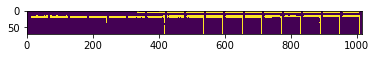

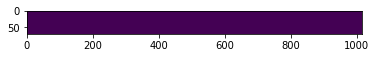


89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
89643725_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_Wit

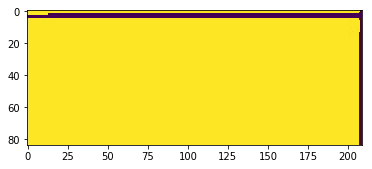

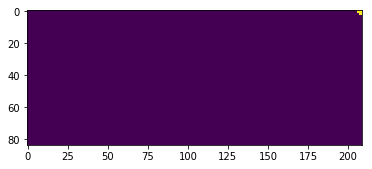

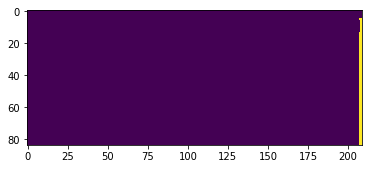

I
88442368_WithoutGrid


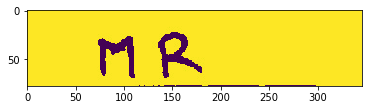

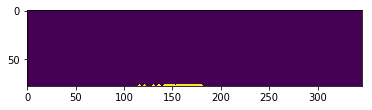

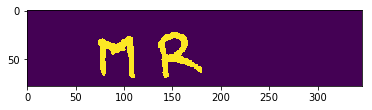

MR
88442368_WithoutGrid


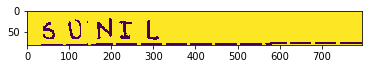

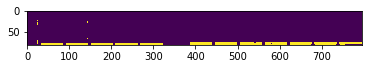

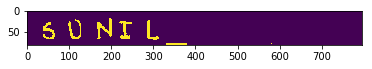

SU NIL
88442368_WithoutGrid


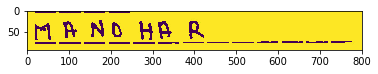

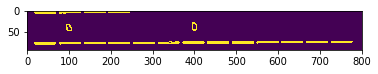

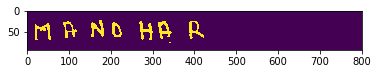

MANOHA R
88442368_WithoutGrid


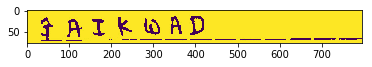

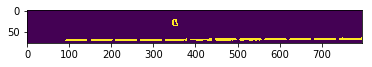

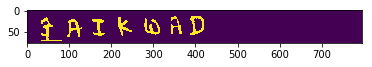

FAIK WAD
88442368_WithoutGrid


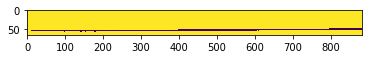

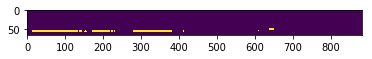

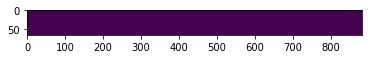


88442368_WithoutGrid


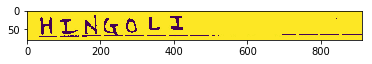

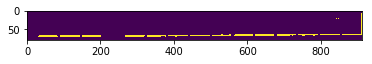

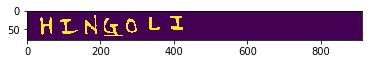

HI NGOLI
88442368_WithoutGrid


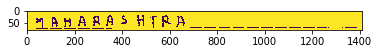

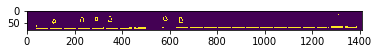

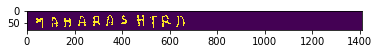

GAHARAS HIRA
88442368_WithoutGrid


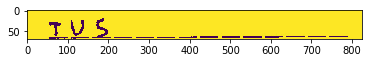

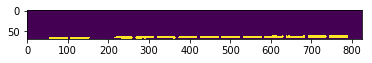

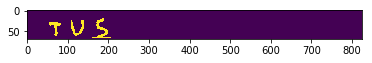

T US
88442368_WithoutGrid


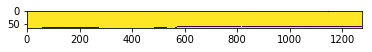

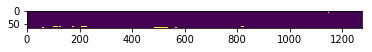

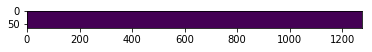


88442368_WithoutGrid


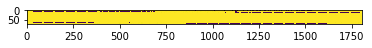

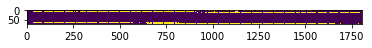

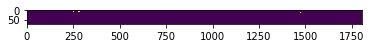


88442368_WithoutGrid


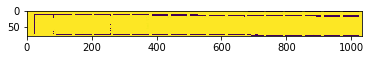

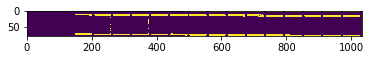

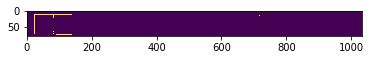

I
88442368_WithoutGrid


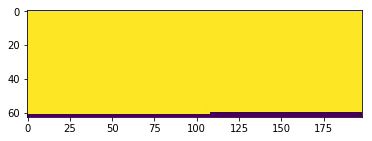

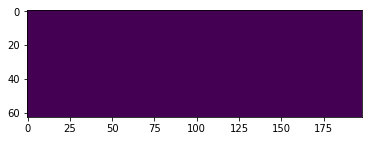

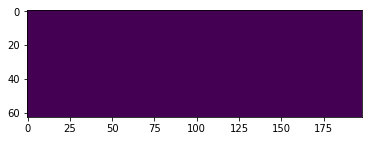


88442368_WithoutGrid


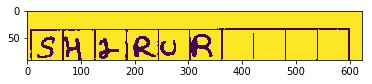

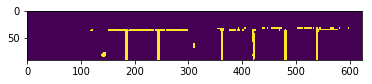

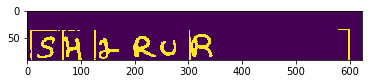

BSHBJRUR T
88442368_WithoutGrid


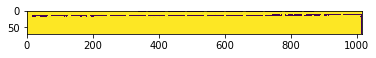

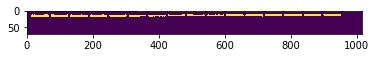

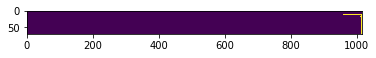

T
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
88442368_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_Wi

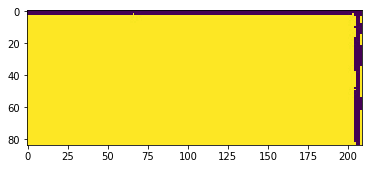

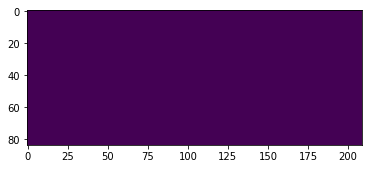

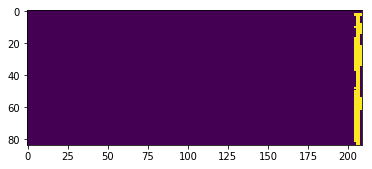

J
89692342_WithoutGrid


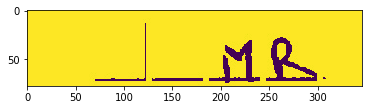

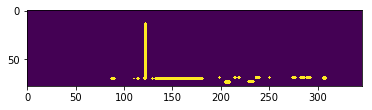

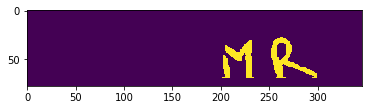

MR
89692342_WithoutGrid


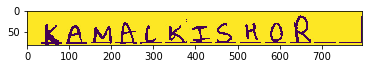

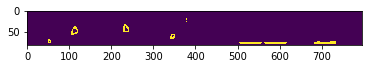

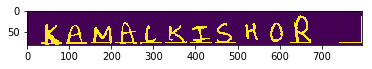

KAMBLBISHOB L
89692342_WithoutGrid


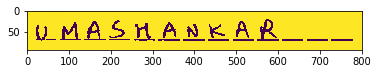

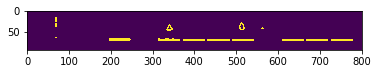

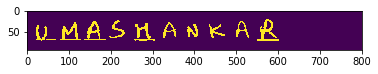

UMBSB ANKAB
89692342_WithoutGrid


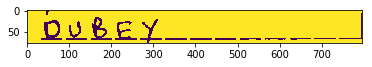

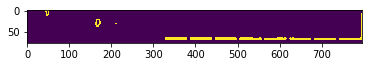

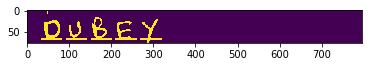

D UBEY
89692342_WithoutGrid


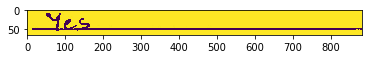

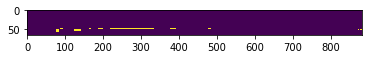

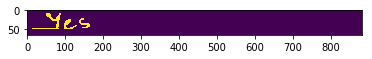

CS
89692342_WithoutGrid


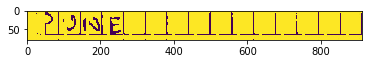

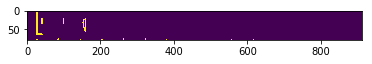

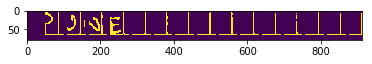

Z WJVYELJJILLJLLIL
89692342_WithoutGrid


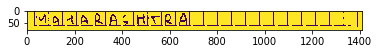

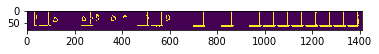

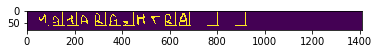

UDAYAAAYHTAA JI
89692342_WithoutGrid


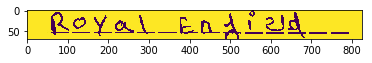

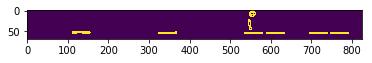

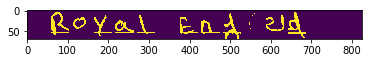

BOYAL EITUD
89692342_WithoutGrid


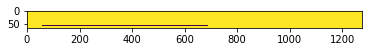

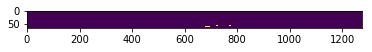

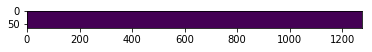


89692342_WithoutGrid


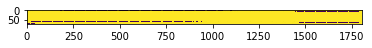

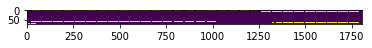

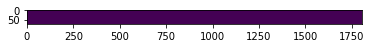


89692342_WithoutGrid


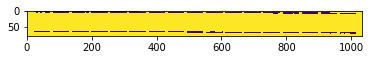

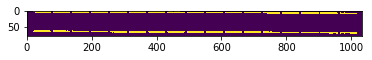

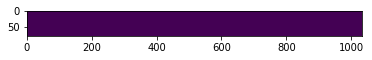


89692342_WithoutGrid


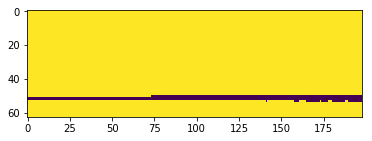

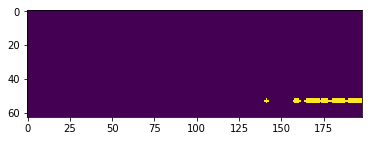

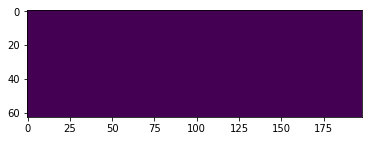


89692342_WithoutGrid


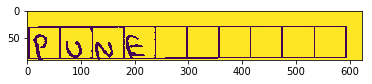

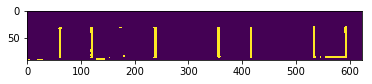

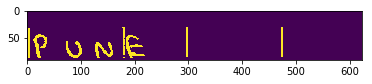

PUNKEJ J
89692342_WithoutGrid


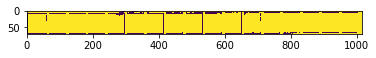

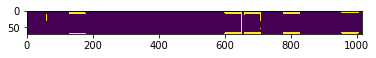

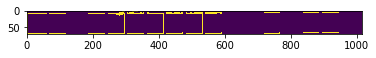

II IJJJJJJ
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
89692342_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88

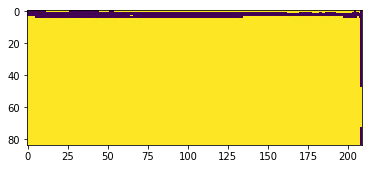

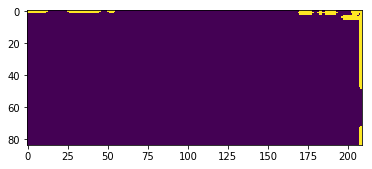

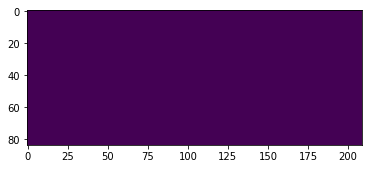


88846722_WithoutGrid


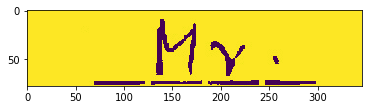

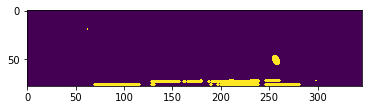

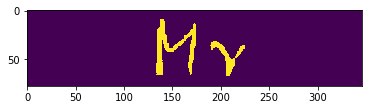

MY
88846722_WithoutGrid


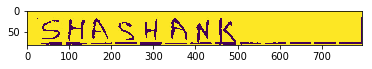

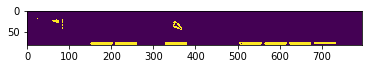

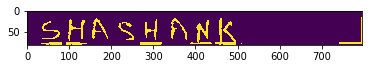

SHASHADK L
88846722_WithoutGrid


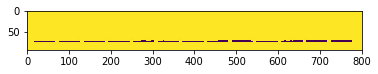

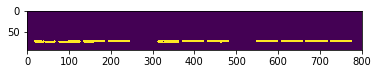

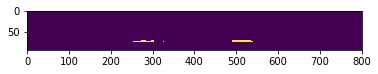


88846722_WithoutGrid


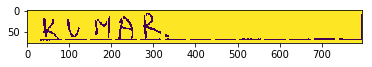

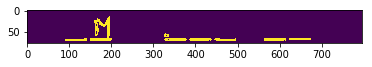

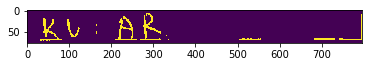

BUAB J
88846722_WithoutGrid


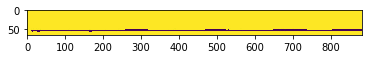

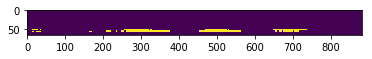

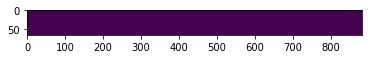


88846722_WithoutGrid


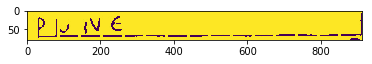

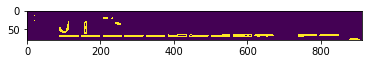

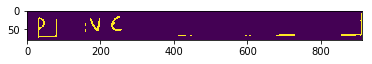

ZVE J
88846722_WithoutGrid


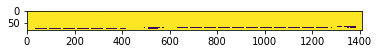

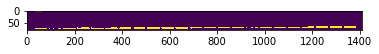

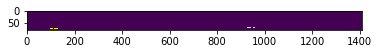


88846722_WithoutGrid


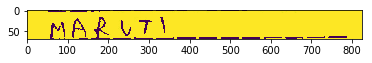

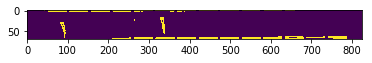

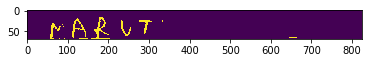

MAB VT
88846722_WithoutGrid


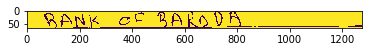

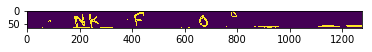

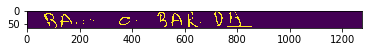

BA CBARD
88846722_WithoutGrid


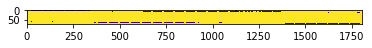

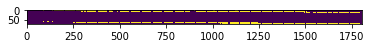

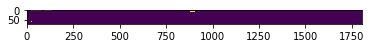


88846722_WithoutGrid


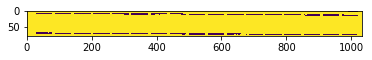

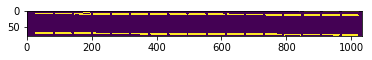

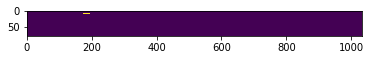


88846722_WithoutGrid


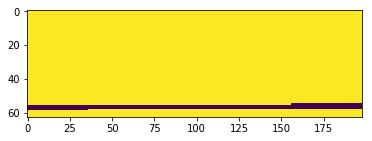

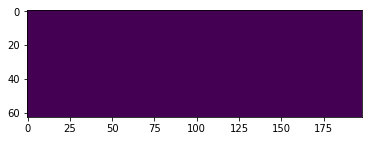

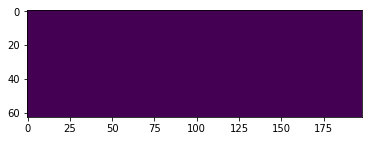


88846722_WithoutGrid


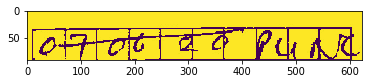

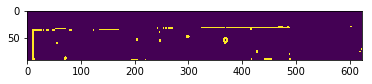

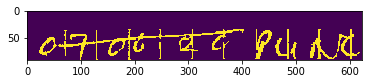

OM IQQUMRX
88846722_WithoutGrid


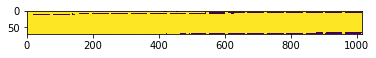

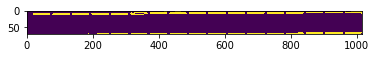

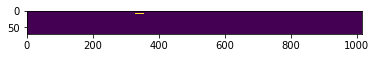


88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
88846722_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_Wit

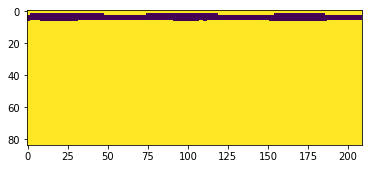

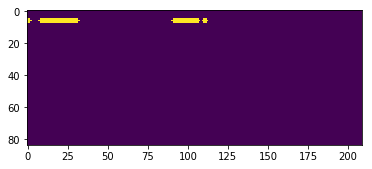

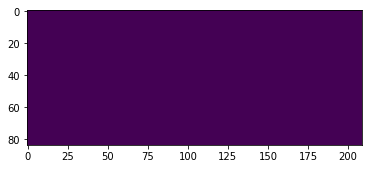


89692530_WithoutGrid


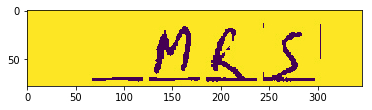

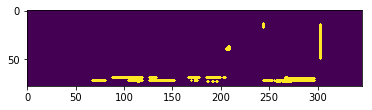

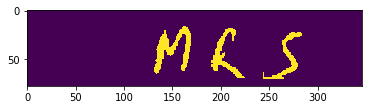

M BS
89692530_WithoutGrid


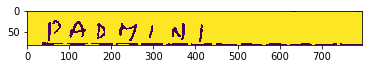

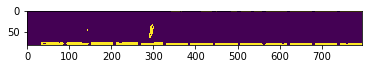

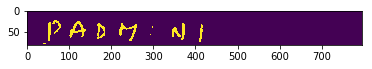

PDADM YL
89692530_WithoutGrid


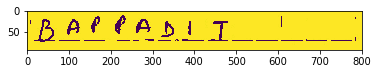

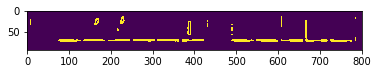

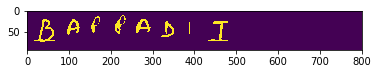

B APPADJJ
89692530_WithoutGrid


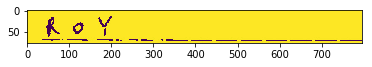

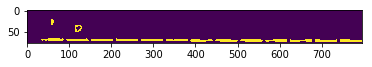

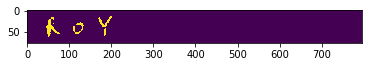

RY
89692530_WithoutGrid


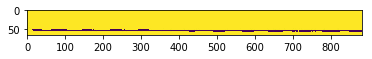

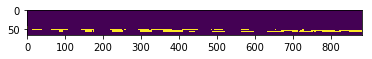

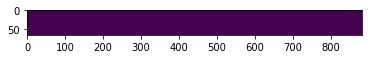


89692530_WithoutGrid


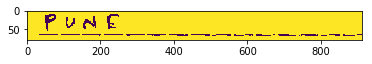

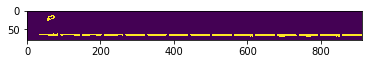

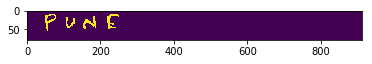

PUN E
89692530_WithoutGrid


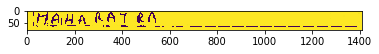

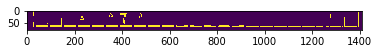

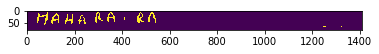

MAHARA RA
89692530_WithoutGrid


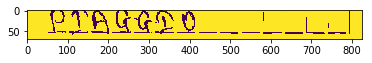

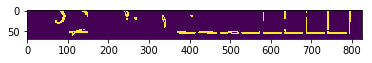

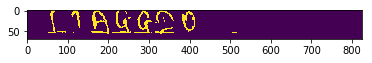

B FO
89692530_WithoutGrid


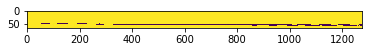

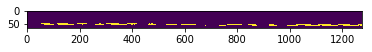

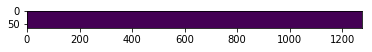


89692530_WithoutGrid


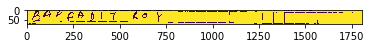

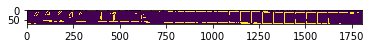

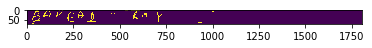

EADL ZOY
89692530_WithoutGrid


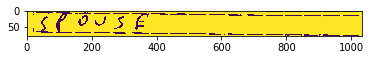

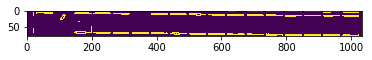

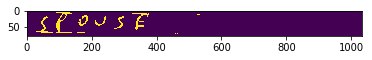

SR OJSE
89692530_WithoutGrid


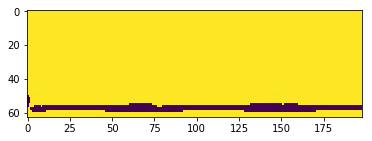

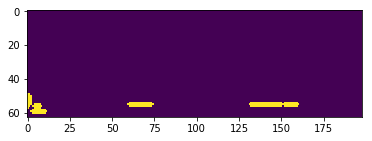

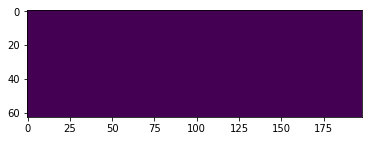


89692530_WithoutGrid


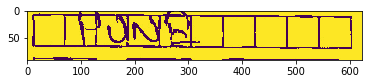

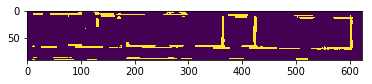

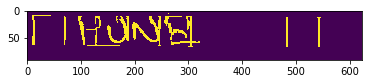

FFUQNQI II
89692530_WithoutGrid


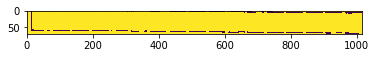

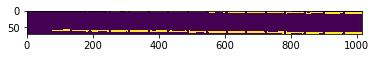

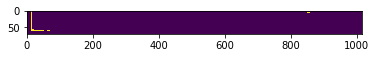


89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
89692530_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_Wit

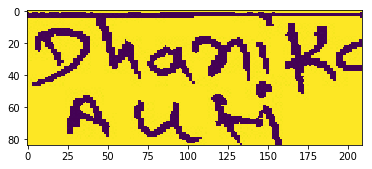

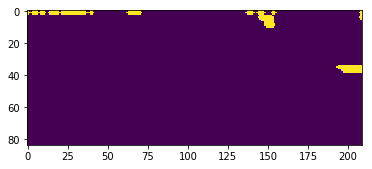

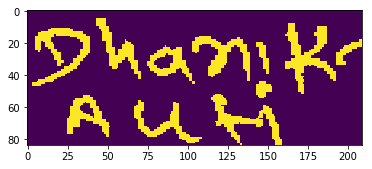

DHDRR K
88879793_WithoutGrid


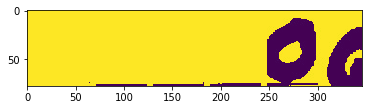

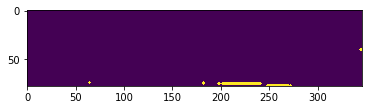

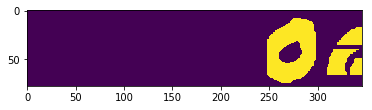

OQ
88879793_WithoutGrid


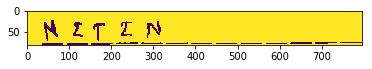

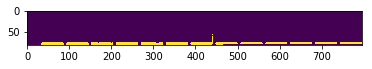

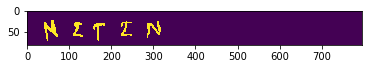

M ITIN
88879793_WithoutGrid


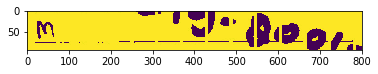

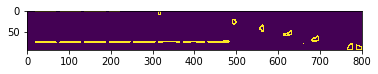

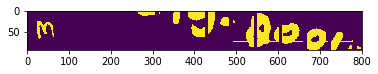

M BBUBEAR
88879793_WithoutGrid


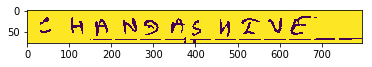

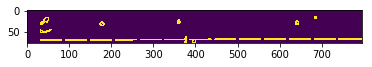

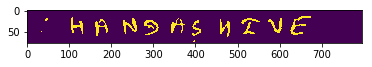

HA NGASWLVE
88879793_WithoutGrid


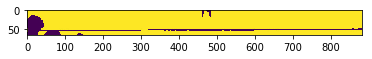

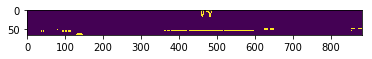

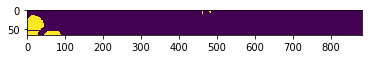

B
88879793_WithoutGrid


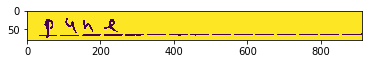

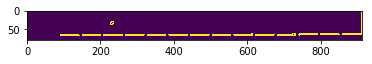

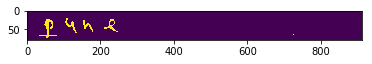

B YHE
88879793_WithoutGrid


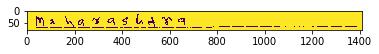

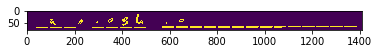

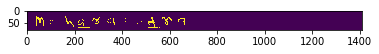

MHAXA DXQ
88879793_WithoutGrid


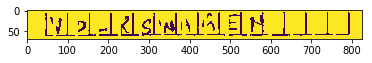

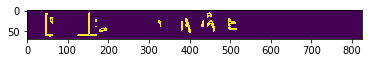

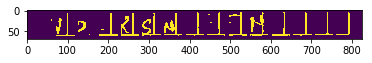

VU JGUGWWIENIIIJ
88879793_WithoutGrid


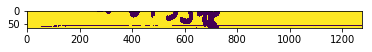

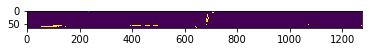

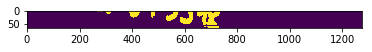

BD
88879793_WithoutGrid


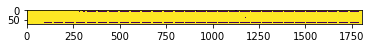

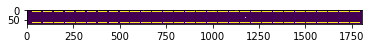

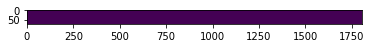


88879793_WithoutGrid


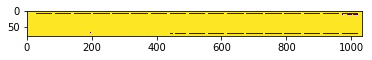

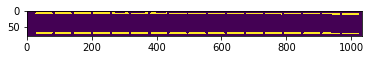

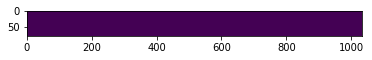


88879793_WithoutGrid


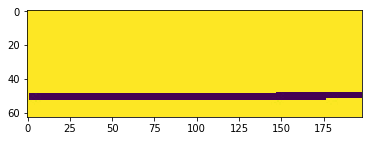

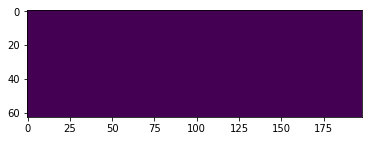

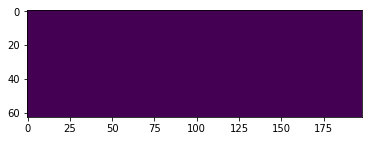


88879793_WithoutGrid


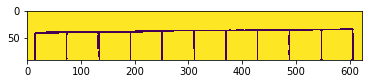

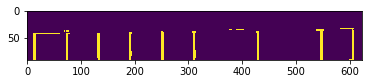

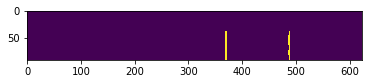

TT
88879793_WithoutGrid


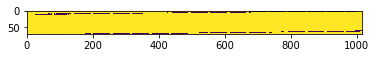

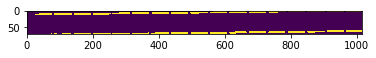

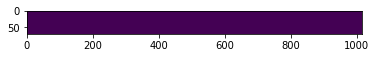


88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
88879793_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_Wit

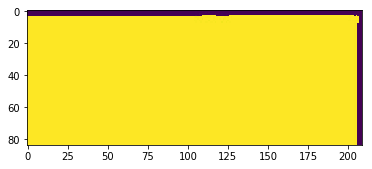

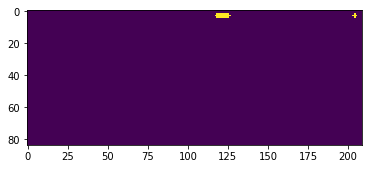

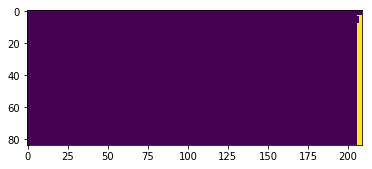

T
89786940_WithoutGrid


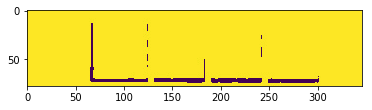

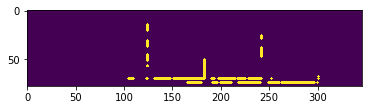

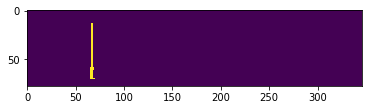

I
89786940_WithoutGrid


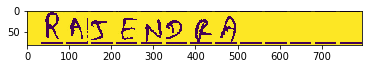

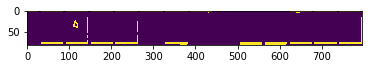

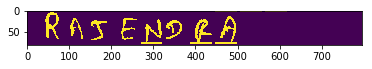

RAJ ENDBA
89786940_WithoutGrid


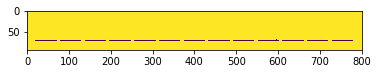

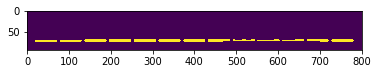

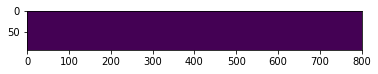


89786940_WithoutGrid


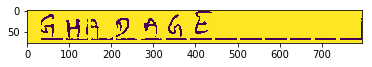

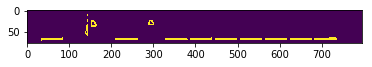

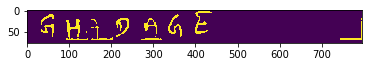

DYIDDGE L
89786940_WithoutGrid


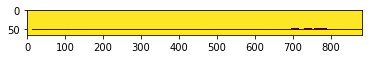

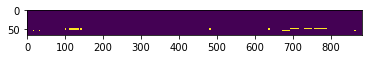

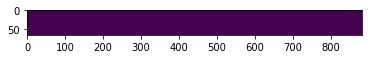


89786940_WithoutGrid


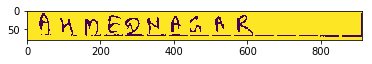

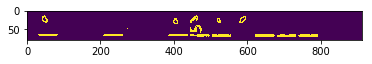

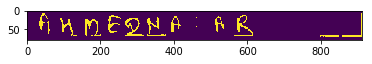

AKMEQNAAB L
89786940_WithoutGrid


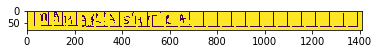

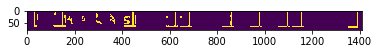

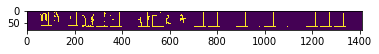

NNNUUUYUCRHIIJI JLJ
89786940_WithoutGrid


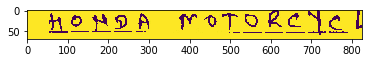

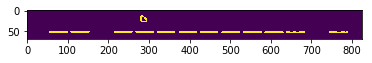

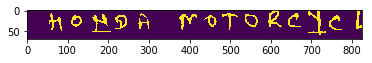

HODDAMOTO CC
89786940_WithoutGrid


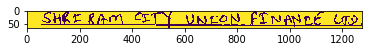

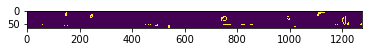

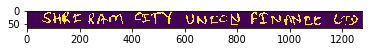

SHGZBAICGC UNCNFINANCKA
89786940_WithoutGrid


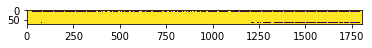

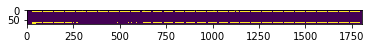

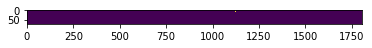


89786940_WithoutGrid


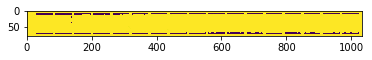

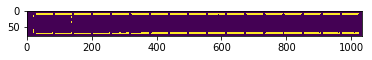

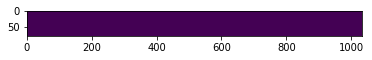


89786940_WithoutGrid


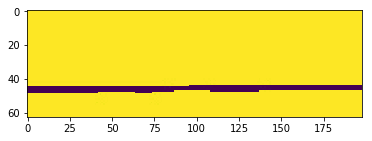

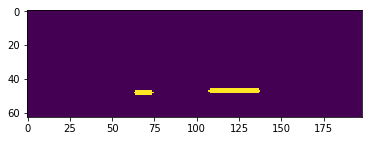

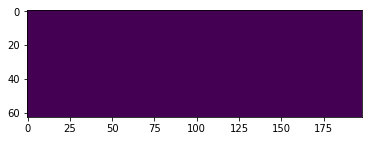


89786940_WithoutGrid


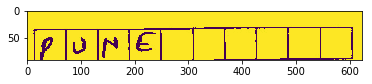

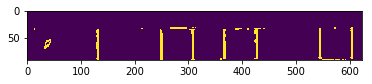

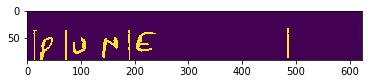

GPURME J
89786940_WithoutGrid


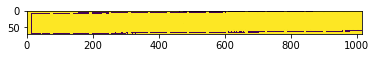

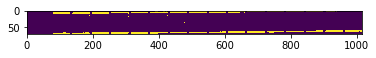

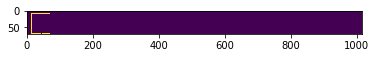

I
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89786940_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_Wi

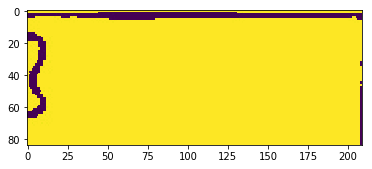

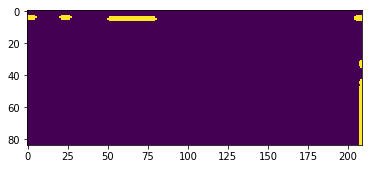

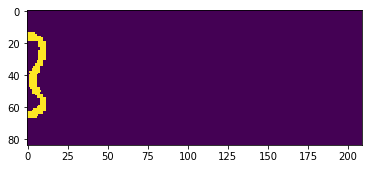


89018374_WithoutGrid


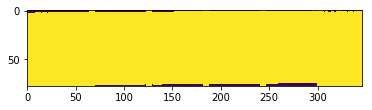

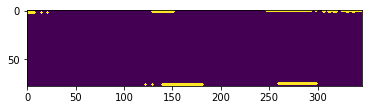

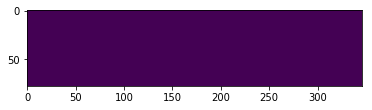


89018374_WithoutGrid


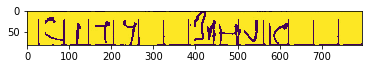

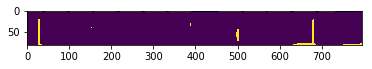

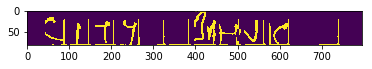

JLTIYJJWHVWK L
89018374_WithoutGrid


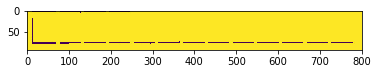

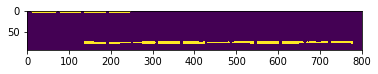

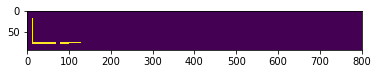

L
89018374_WithoutGrid


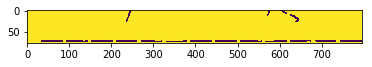

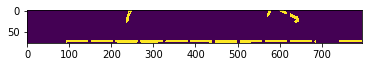

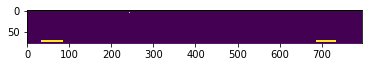


89018374_WithoutGrid


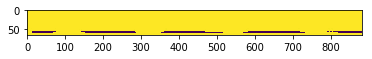

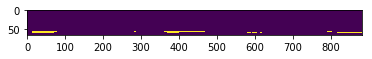

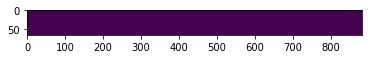


89018374_WithoutGrid


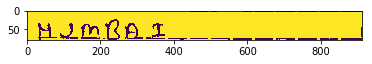

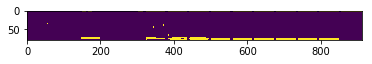

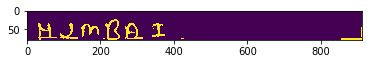

YJRBAI L
89018374_WithoutGrid


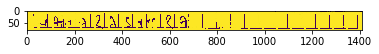

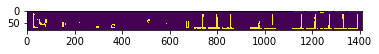

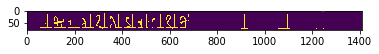

YGDDUDSWUUZJ JI
89018374_WithoutGrid


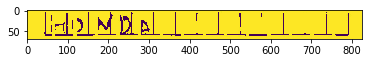

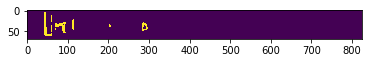

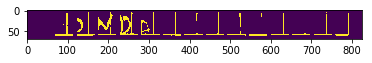

D DDNDDILJILIJIJ
89018374_WithoutGrid


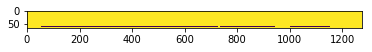

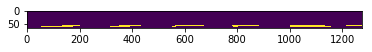

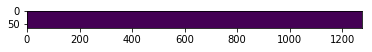


89018374_WithoutGrid


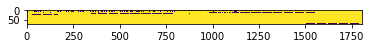

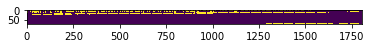

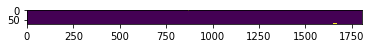


89018374_WithoutGrid


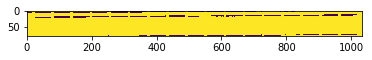

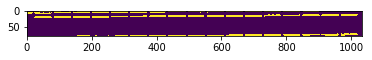

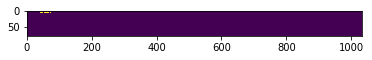


89018374_WithoutGrid


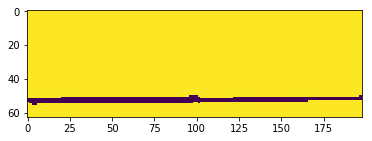

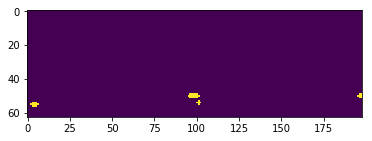

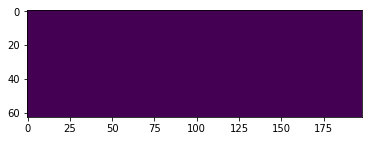


89018374_WithoutGrid


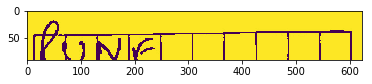

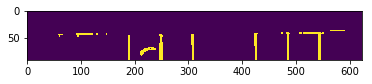

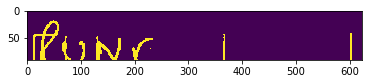

UJNFT L
89018374_WithoutGrid


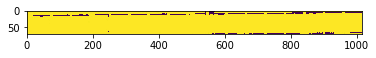

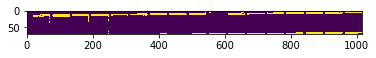

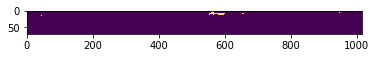


89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89018374_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_Wit

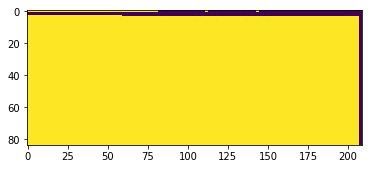

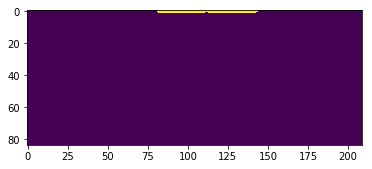

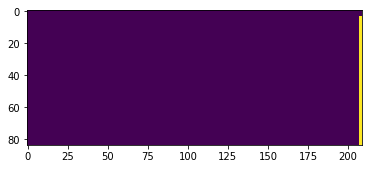

I
89068148_WithoutGrid


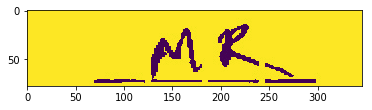

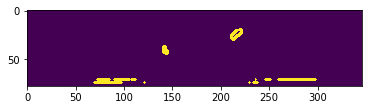

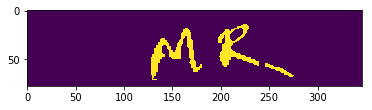

MR
89068148_WithoutGrid


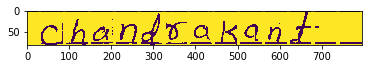

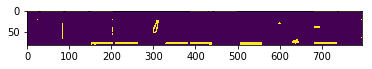

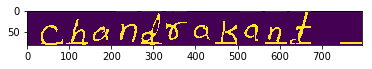

CBANDJAB AN
89068148_WithoutGrid


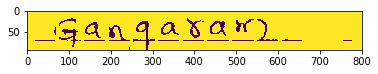

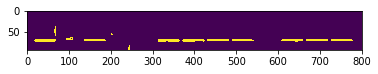

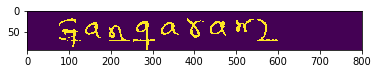

GANG AYAKZ
89068148_WithoutGrid


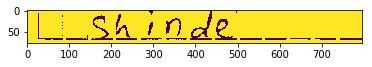

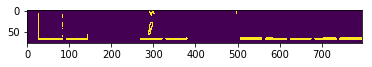

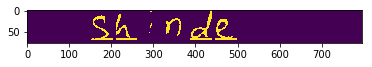

SH NE
89068148_WithoutGrid


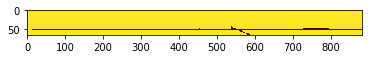

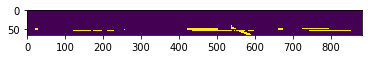

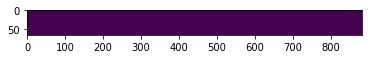


89068148_WithoutGrid


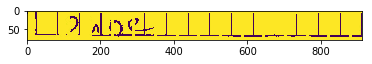

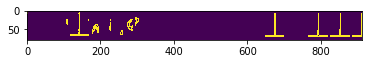

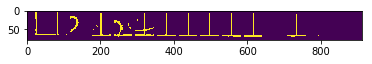

JXDNBJIIII L
89068148_WithoutGrid


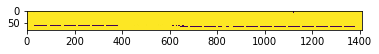

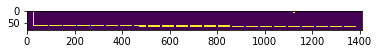

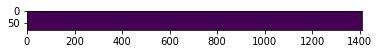


89068148_WithoutGrid


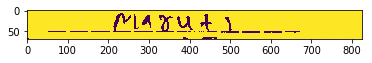

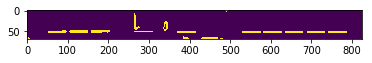

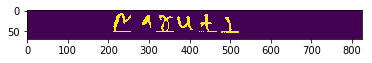

R GBUTJ
89068148_WithoutGrid


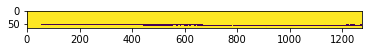

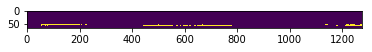

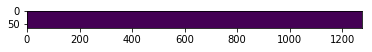


89068148_WithoutGrid


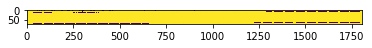

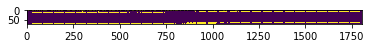

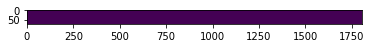


89068148_WithoutGrid


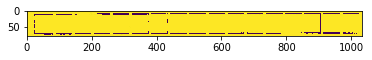

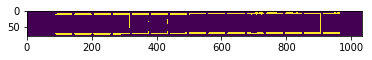

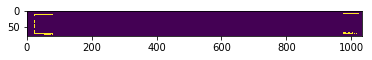

CJ
89068148_WithoutGrid


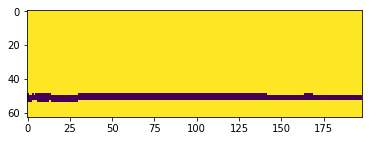

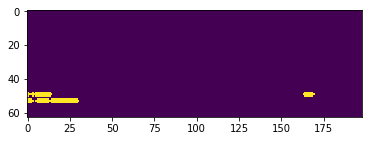

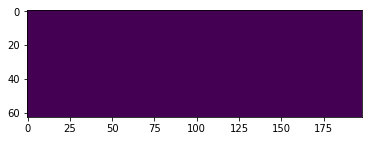


89068148_WithoutGrid


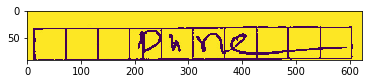

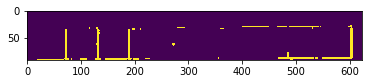

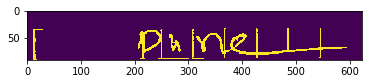

XHRU JF
89068148_WithoutGrid


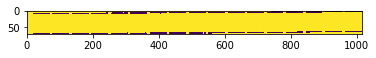

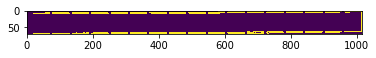

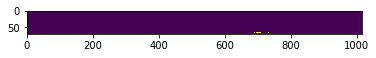


89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89068148_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_Wit

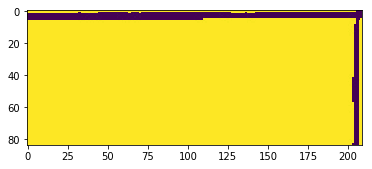

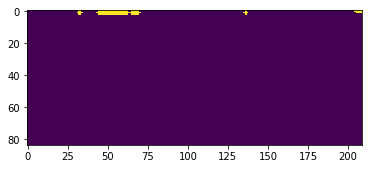

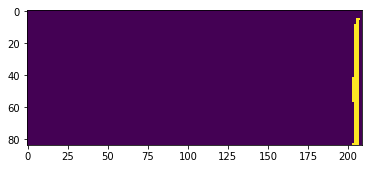

J
89095826_WithoutGrid


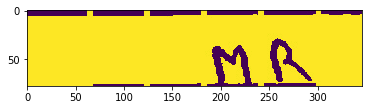

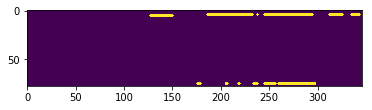

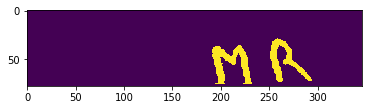

MR
89095826_WithoutGrid


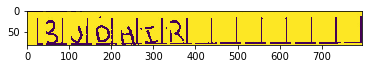

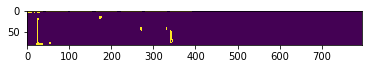

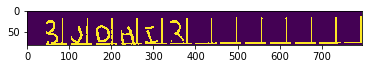

Y JDDWDAWIIIIIIJ
89095826_WithoutGrid


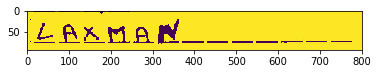

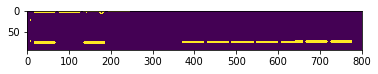

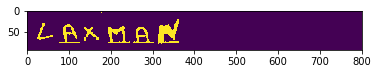

LB XMAN
89095826_WithoutGrid


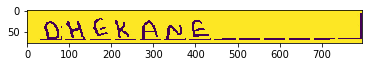

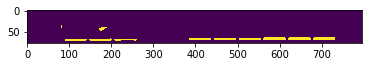

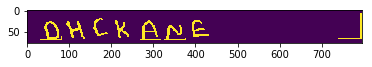

DHEKANE J
89095826_WithoutGrid


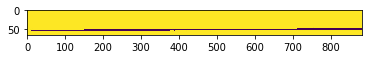

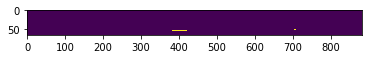

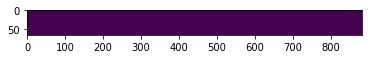


89095826_WithoutGrid


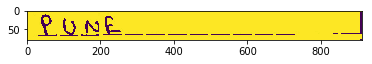

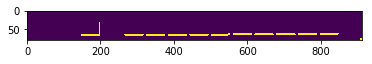

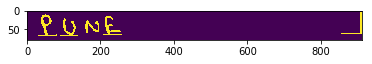

PUNE J
89095826_WithoutGrid


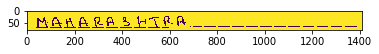

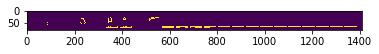

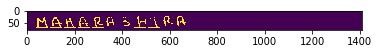

MABABA GBJRA
89095826_WithoutGrid


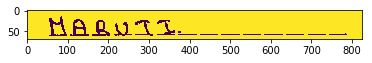

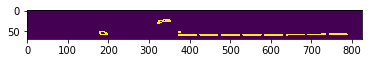

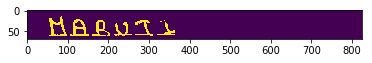

D ABUJD
89095826_WithoutGrid


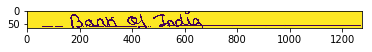

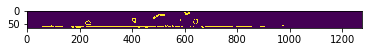

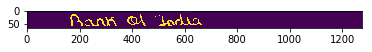

B KDD
89095826_WithoutGrid


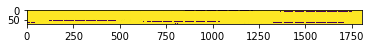

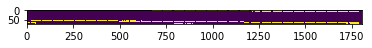

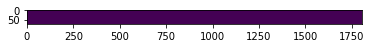


89095826_WithoutGrid


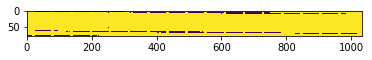

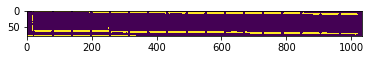

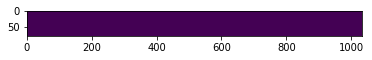


89095826_WithoutGrid


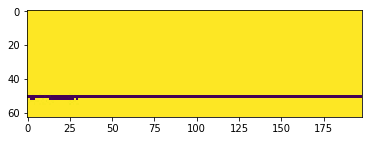

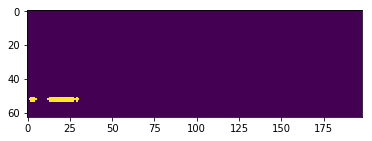

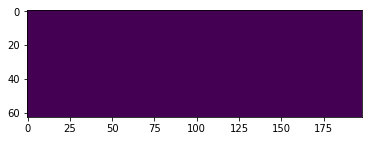


89095826_WithoutGrid


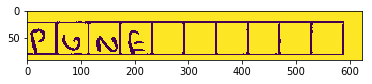

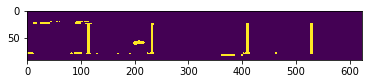

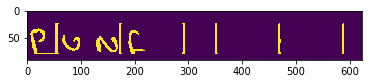

RBUNWEJI JJ
89095826_WithoutGrid


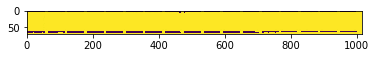

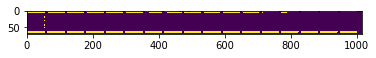

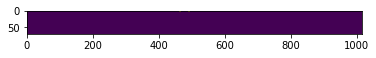


89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89095826_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_Wit

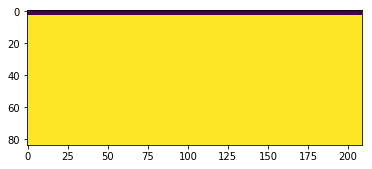

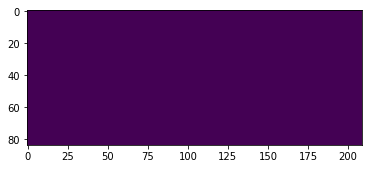

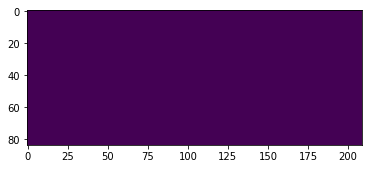


89186438_WithoutGrid


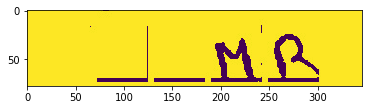

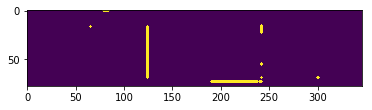

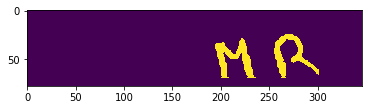

MB
89186438_WithoutGrid


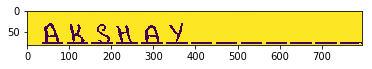

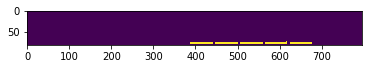

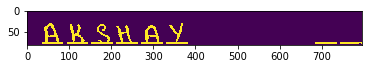

B BSHAY
89186438_WithoutGrid


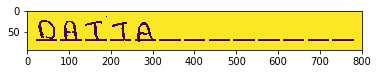

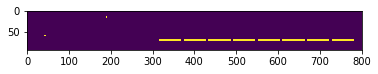

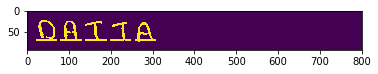

D BIJA
89186438_WithoutGrid


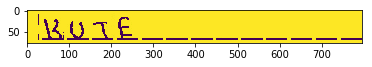

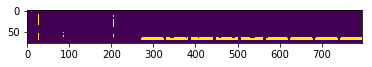

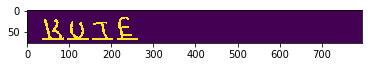

B UJE
89186438_WithoutGrid


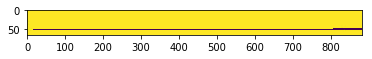

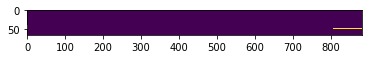

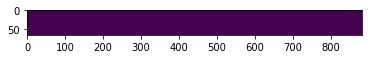


89186438_WithoutGrid


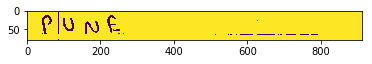

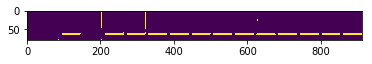

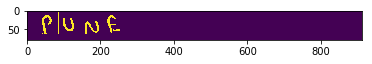

RUN E
89186438_WithoutGrid


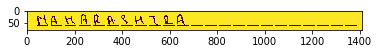

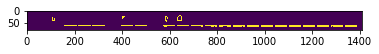

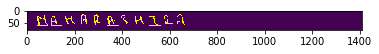

MAD ARASHIRA
89186438_WithoutGrid


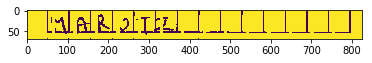

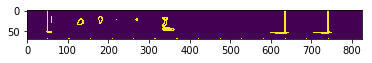

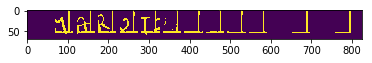

J JJJ
89186438_WithoutGrid


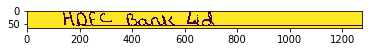

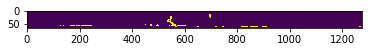

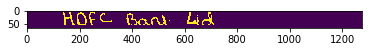

HOFCBS W
89186438_WithoutGrid


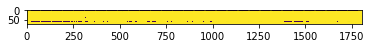

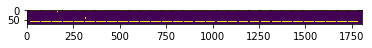

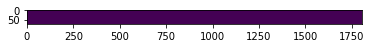


89186438_WithoutGrid


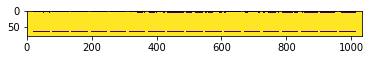

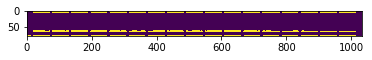

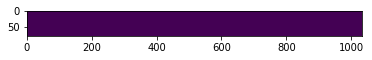


89186438_WithoutGrid


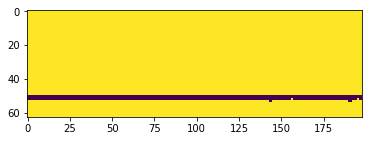

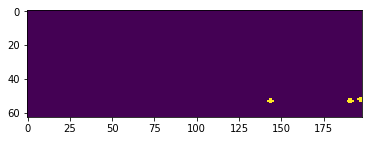

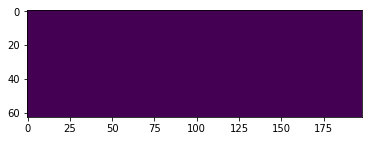


89186438_WithoutGrid


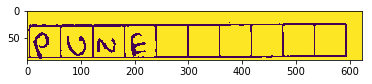

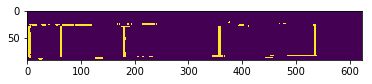

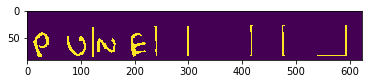

PUWVEJJ JJI
89186438_WithoutGrid


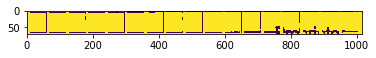

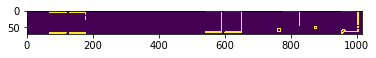

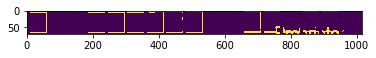

J JIJIJJJI
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89186438_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89

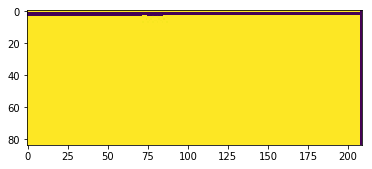

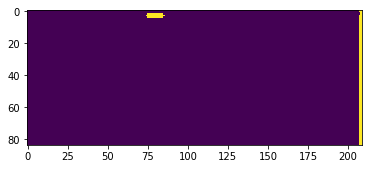

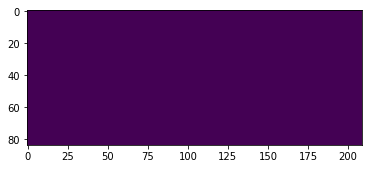


89268187_WithoutGrid


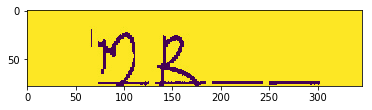

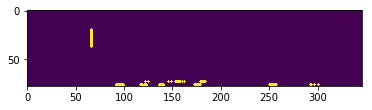

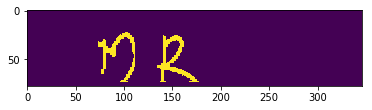

MR
89268187_WithoutGrid


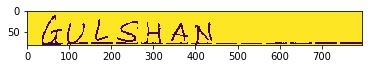

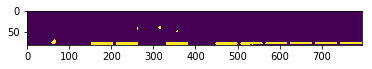

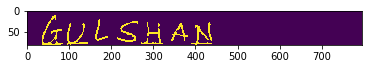

GULSB AD
89268187_WithoutGrid


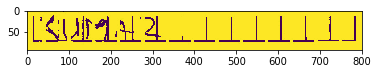

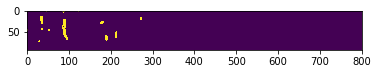

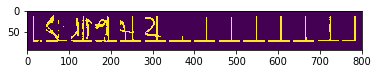

S WUPYTZILLIILLJ
89268187_WithoutGrid


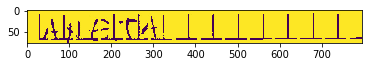

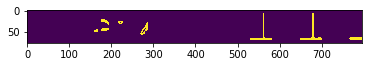

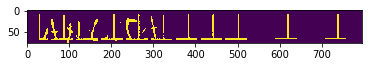

BBBYUWLIL LI
89268187_WithoutGrid


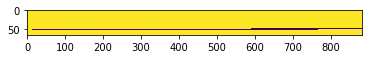

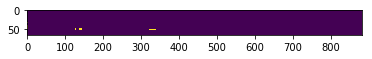

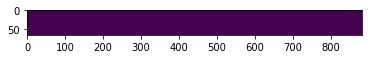


89268187_WithoutGrid


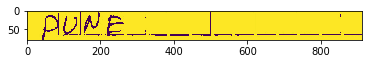

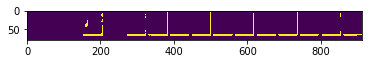

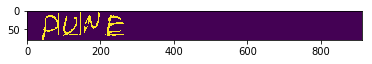

P UNE
89268187_WithoutGrid


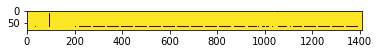

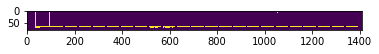

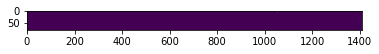


89268187_WithoutGrid


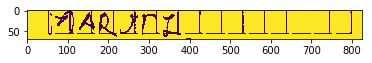

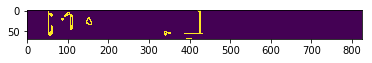

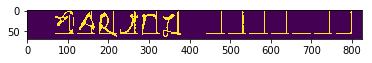

ARYID JJJJLJJ
89268187_WithoutGrid


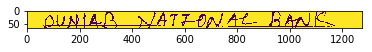

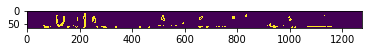

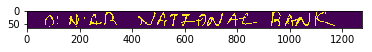

ONQABWAJTNH BM
89268187_WithoutGrid


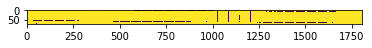

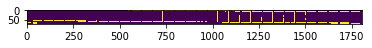

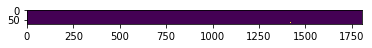


89268187_WithoutGrid


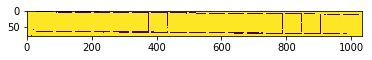

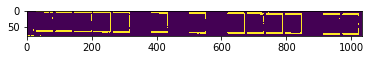

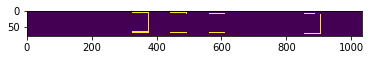

IJI J
89268187_WithoutGrid


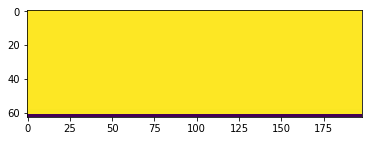

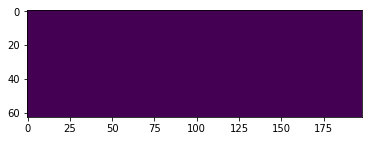

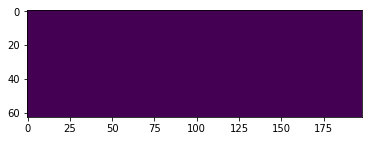


89268187_WithoutGrid


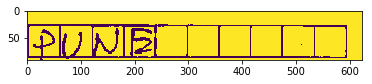

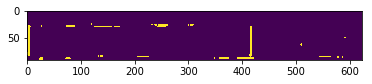

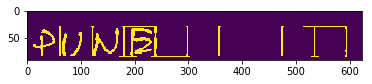

PUMUNBBC JJI
89268187_WithoutGrid


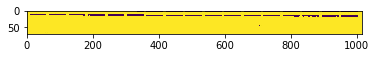

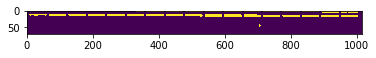

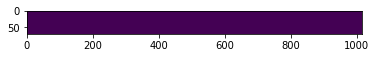


89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89268187_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_Wit

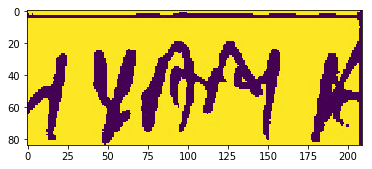

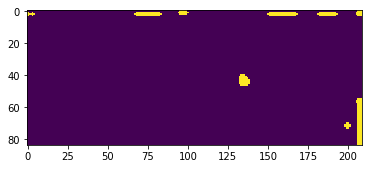

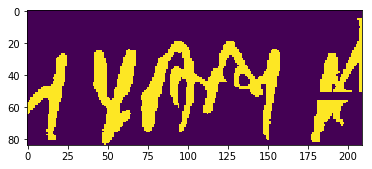

MM W
89272212_WithoutGrid


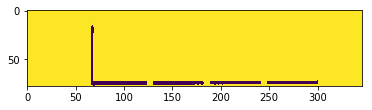

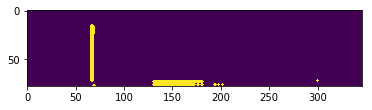

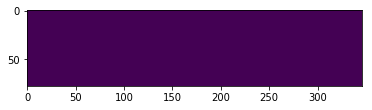


89272212_WithoutGrid


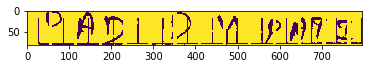

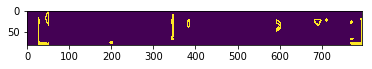

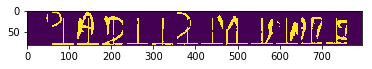

I ADJJZULNUUWMMB
89272212_WithoutGrid


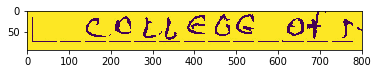

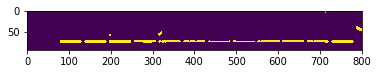

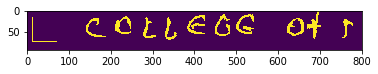

JCCLBGGGO F
89272212_WithoutGrid


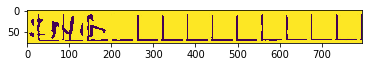

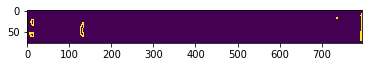

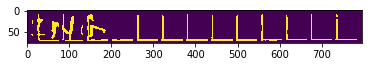

UYW BLLJLLLLLLL
89272212_WithoutGrid


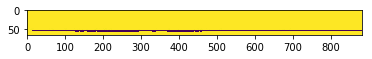

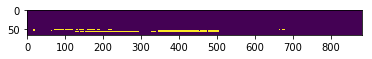

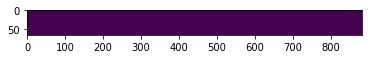


89272212_WithoutGrid


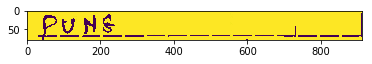

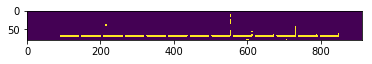

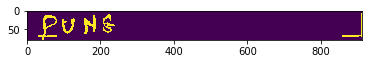

QUHF L
89272212_WithoutGrid


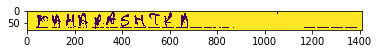

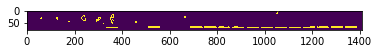

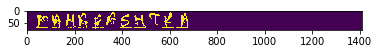

EBHAKASD TKB
89272212_WithoutGrid


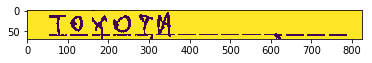

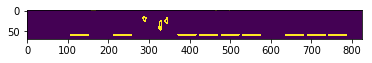

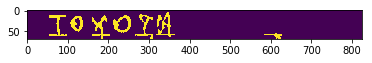

J QYOIN
89272212_WithoutGrid


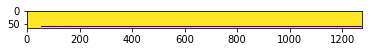

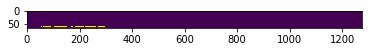

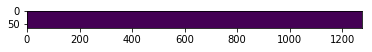


89272212_WithoutGrid


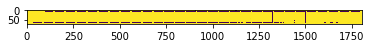

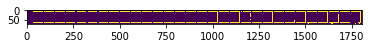

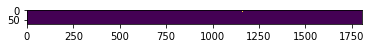


89272212_WithoutGrid


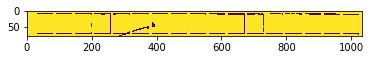

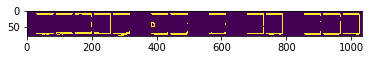

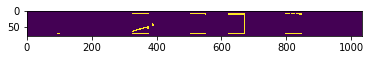

Z IIJ
89272212_WithoutGrid


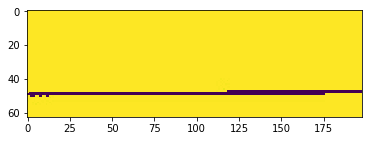

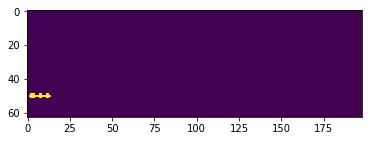

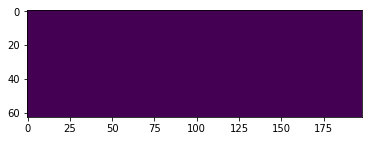


89272212_WithoutGrid


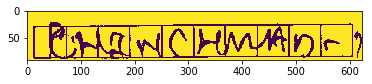

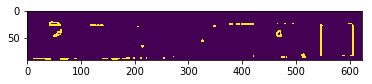

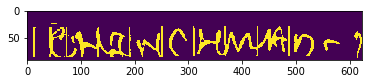

PDWCUM DD
89272212_WithoutGrid


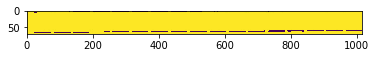

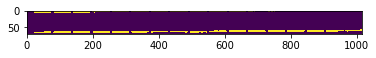

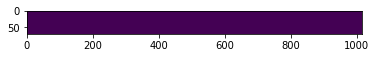


89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89272212_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_Wit

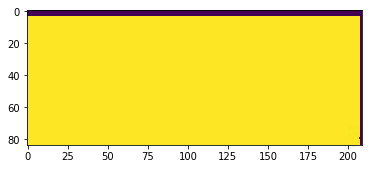

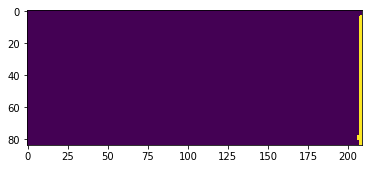

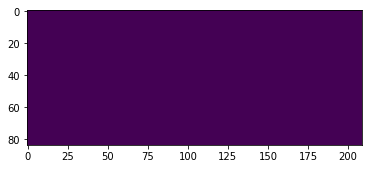


89283306_WithoutGrid


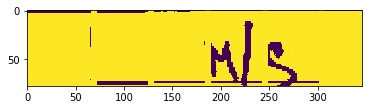

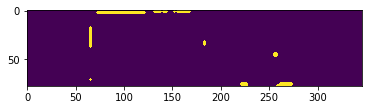

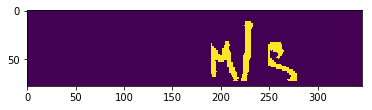

M WS
89283306_WithoutGrid


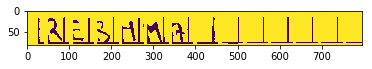

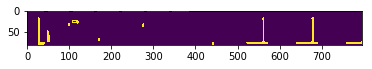

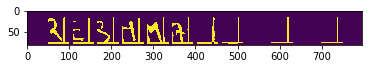

RBCJBYYADIJ II
89283306_WithoutGrid


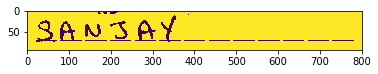

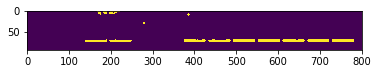

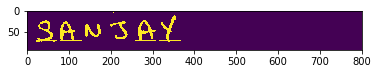

S ANJBY
89283306_WithoutGrid


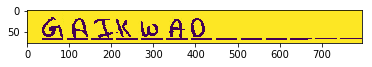

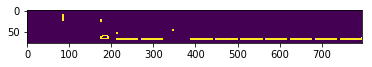

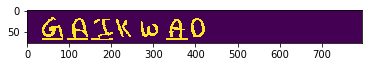

G AJKKWAO
89283306_WithoutGrid


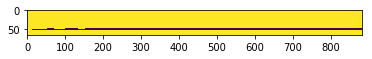

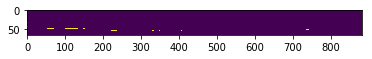

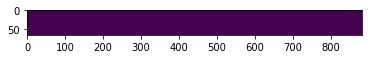


89283306_WithoutGrid


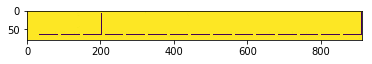

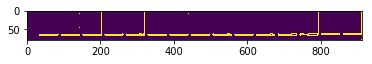

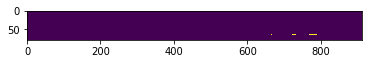


89283306_WithoutGrid


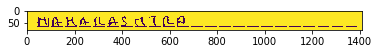

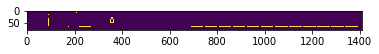

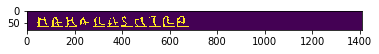

DAB MBAYJIBA
89283306_WithoutGrid


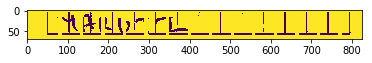

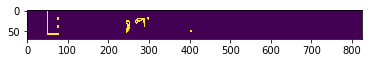

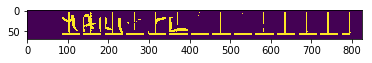

Y WMUKBKLLLILLLJ
89283306_WithoutGrid


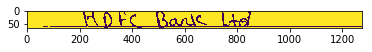

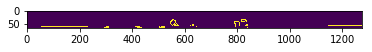

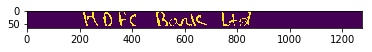

YDDAL SLCBB
89283306_WithoutGrid


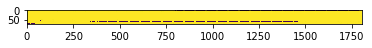

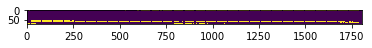

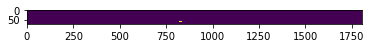


89283306_WithoutGrid


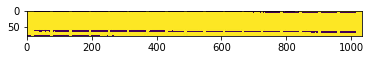

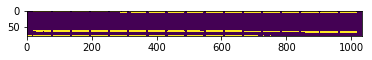

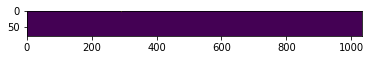


89283306_WithoutGrid


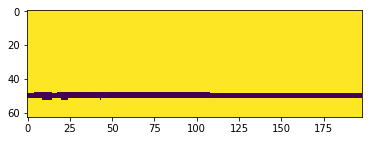

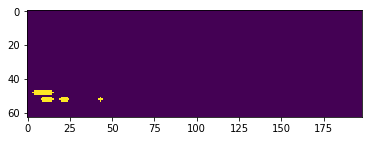

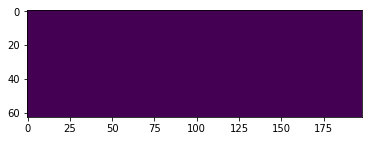


89283306_WithoutGrid


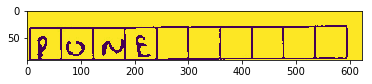

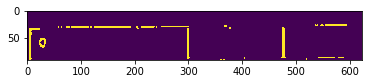

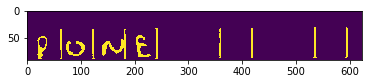

PBUWREJ JJJJ
89283306_WithoutGrid


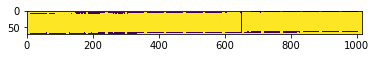

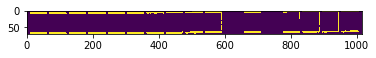

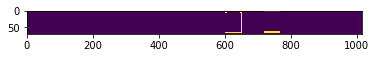

II
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89283306_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_W

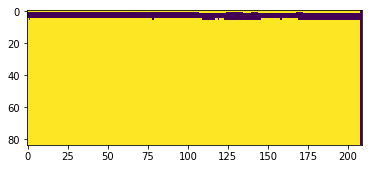

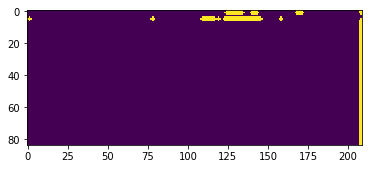

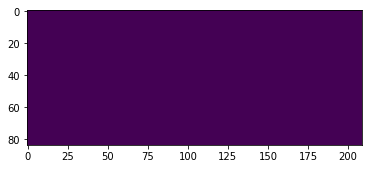


89294322_WithoutGrid


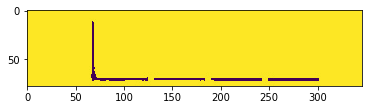

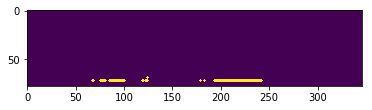

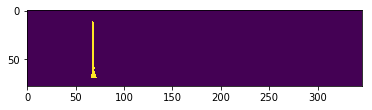

I
89294322_WithoutGrid


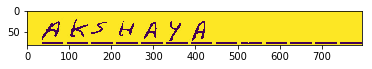

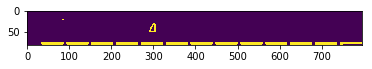

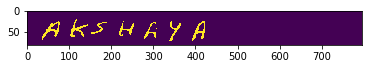

A KSHAYA
89294322_WithoutGrid


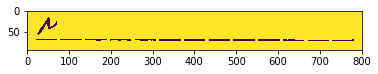

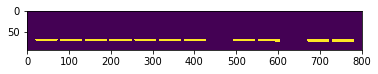

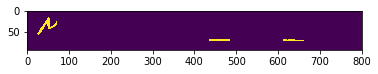

N
89294322_WithoutGrid


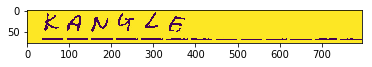

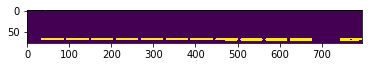

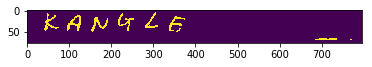

KANG LE
89294322_WithoutGrid


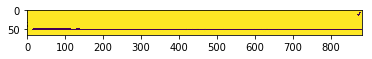

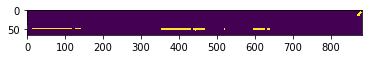

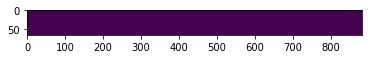


89294322_WithoutGrid


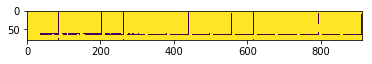

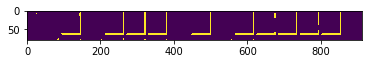

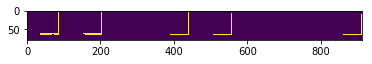

JLLJ L
89294322_WithoutGrid


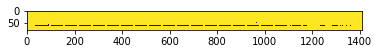

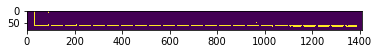

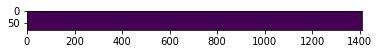


89294322_WithoutGrid


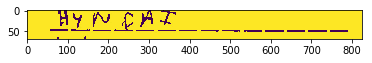

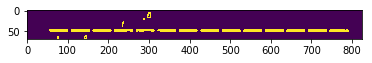

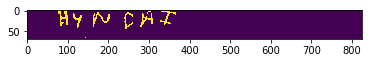

YNC I
89294322_WithoutGrid


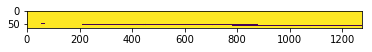

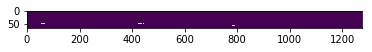

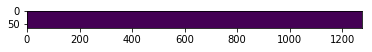


89294322_WithoutGrid


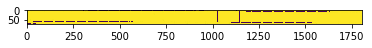

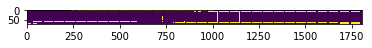

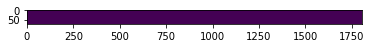


89294322_WithoutGrid


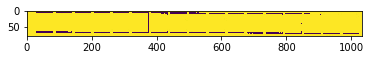

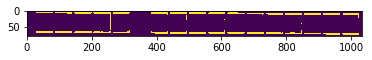

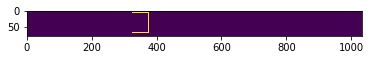

I
89294322_WithoutGrid


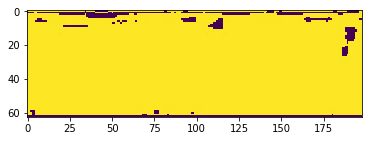

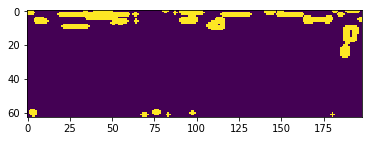

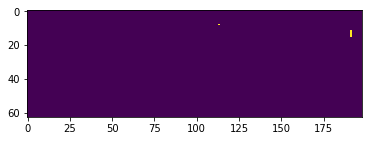


89294322_WithoutGrid


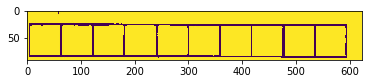

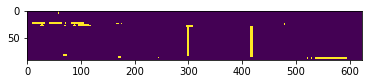

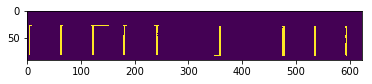

IIIJJ JJJ
89294322_WithoutGrid


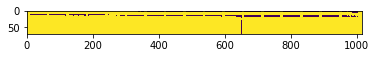

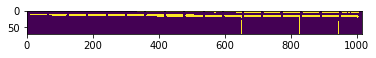

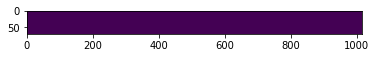


89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89294322_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_Wit

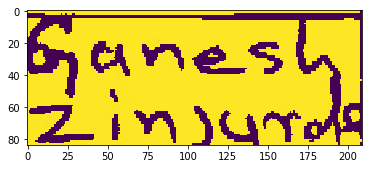

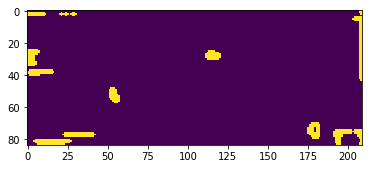

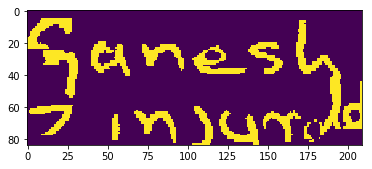

NY
89349370_WithoutGrid


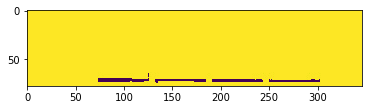

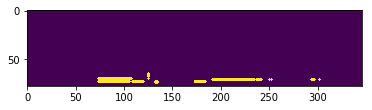

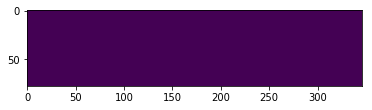


89349370_WithoutGrid


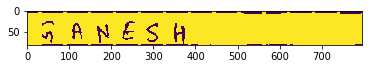

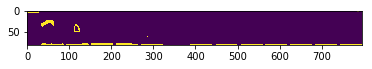

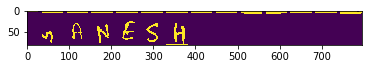

M ANESH
89349370_WithoutGrid


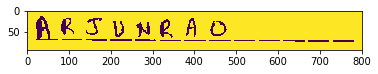

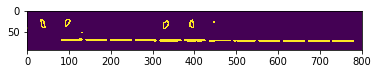

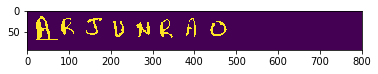

ARJ UNRAD
89349370_WithoutGrid


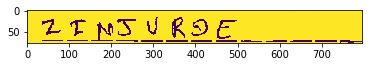

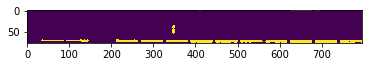

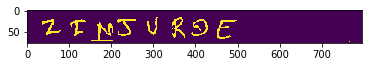

ZTDJ VRGE
89349370_WithoutGrid


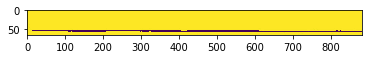

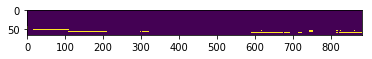

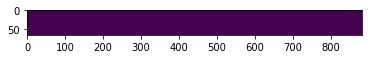


89349370_WithoutGrid


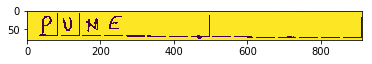

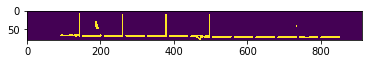

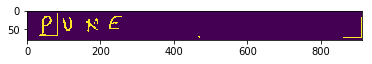

PUNE L
89349370_WithoutGrid


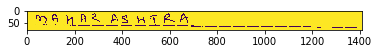

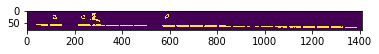

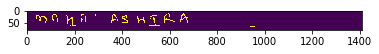

RABA ASHIRA
89349370_WithoutGrid


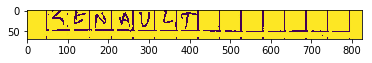

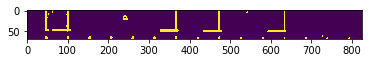

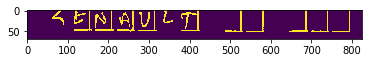

G NAVL
89349370_WithoutGrid


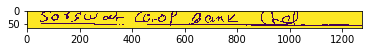

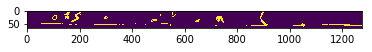

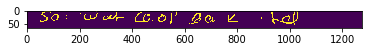

S IUUOBUT
89349370_WithoutGrid


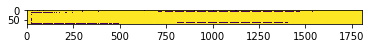

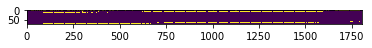

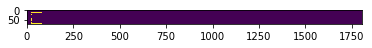

I
89349370_WithoutGrid


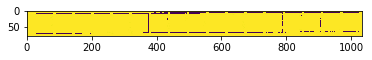

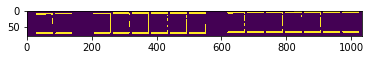

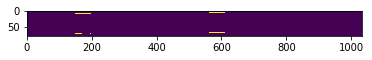

JI
89349370_WithoutGrid


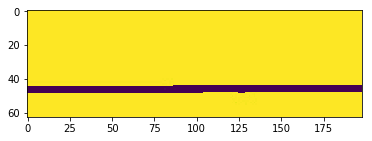

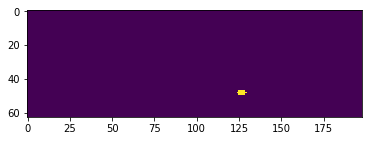

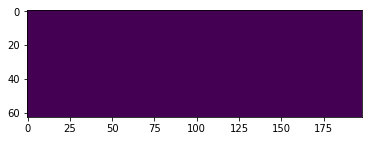


89349370_WithoutGrid


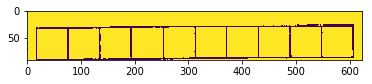

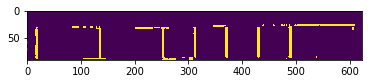

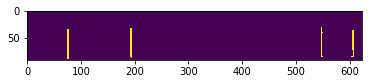

JJ I
89349370_WithoutGrid


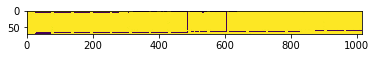

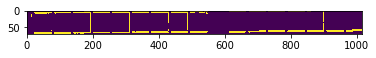

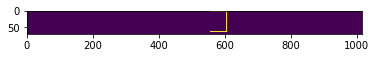


89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89349370_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_Wit

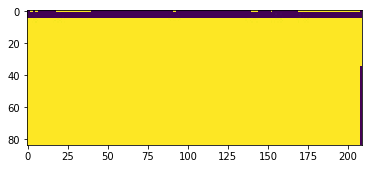

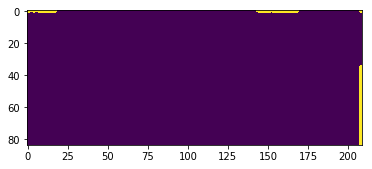

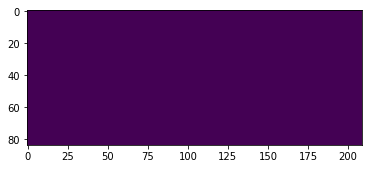


89394891_WithoutGrid


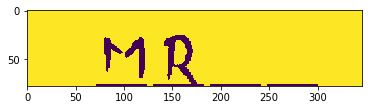

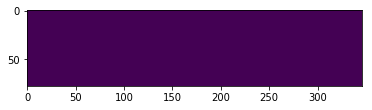

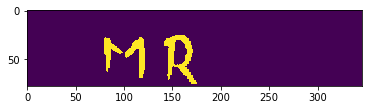

RG B
89394891_WithoutGrid


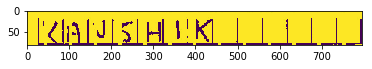

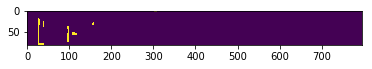

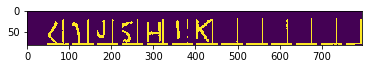

U UJUSHHUIKIIIIIJ
89394891_WithoutGrid


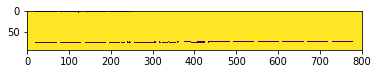

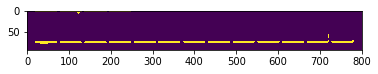

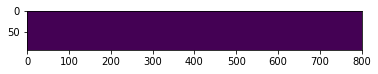


89394891_WithoutGrid


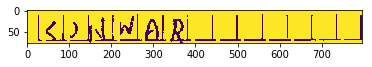

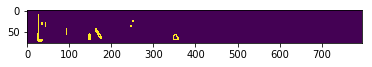

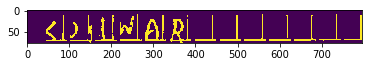

U JUUWWAAIILLJIL
89394891_WithoutGrid


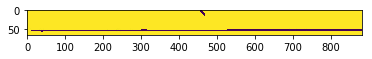

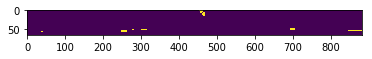

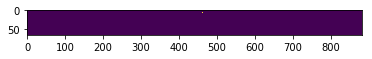


89394891_WithoutGrid


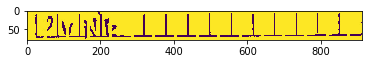

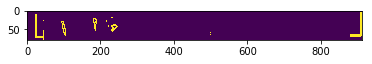

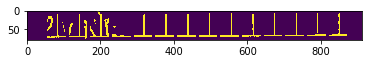

UJIW VLLLLJJIILL
89394891_WithoutGrid


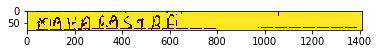

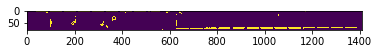

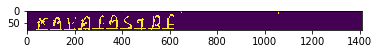

EKM UEBBSIBF
89394891_WithoutGrid


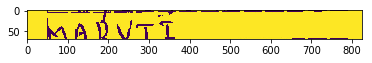

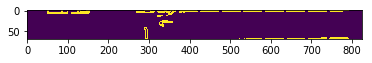

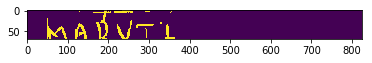

MAV L
89394891_WithoutGrid


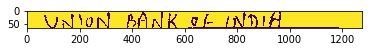

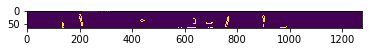

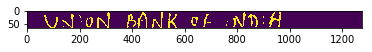

VNQON BANKOFLND
89394891_WithoutGrid


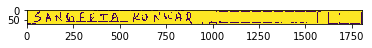

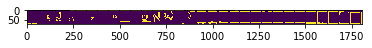

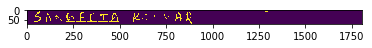

SBNGEEJBKU AR
89394891_WithoutGrid


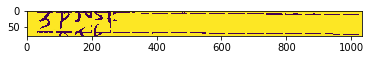

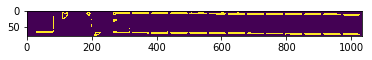

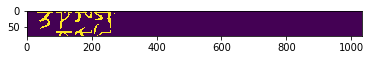

RL
89394891_WithoutGrid


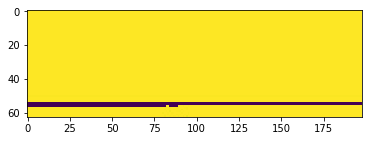

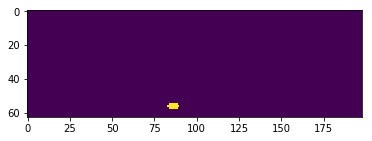

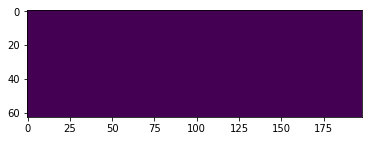


89394891_WithoutGrid


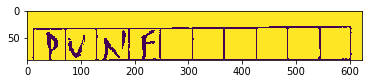

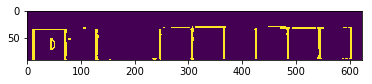

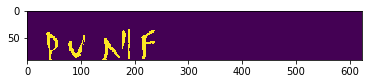

PW ANDF
89394891_WithoutGrid


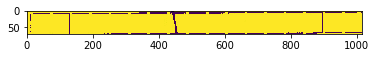

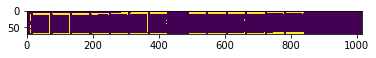

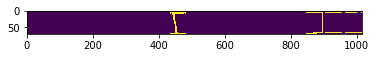

J JJ
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89394891_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971

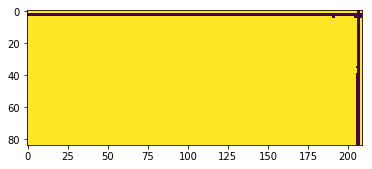

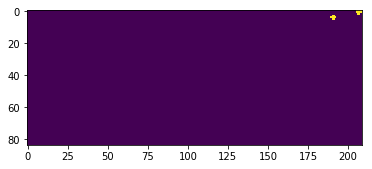

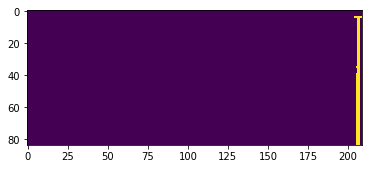

J
89418971_WithoutGrid


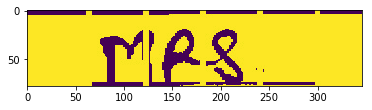

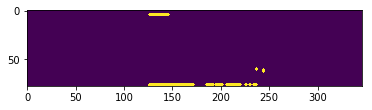

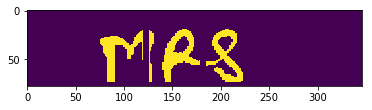

M YRS
89418971_WithoutGrid


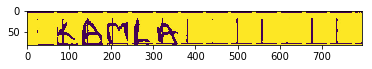

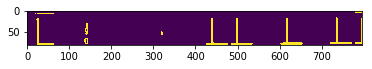

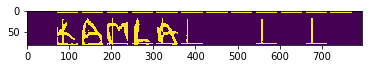

BBMLAL LL
89418971_WithoutGrid


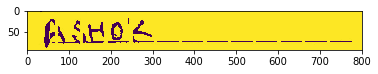

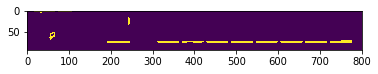

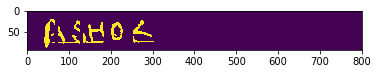

FBCH OG
89418971_WithoutGrid


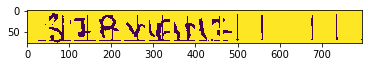

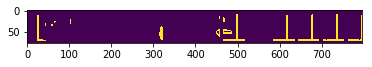

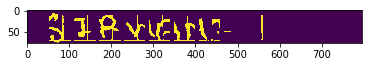

JZBXUGVU I
89418971_WithoutGrid


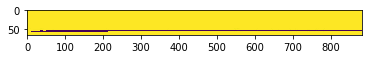

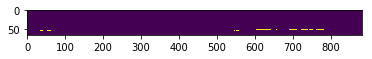

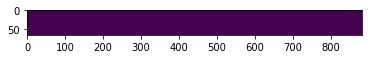


89418971_WithoutGrid


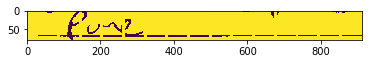

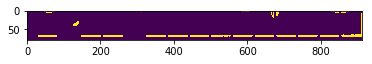

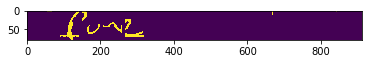

B YUNG
89418971_WithoutGrid


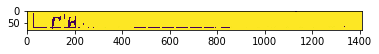

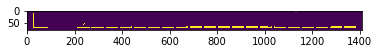

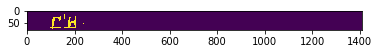

CW
89418971_WithoutGrid


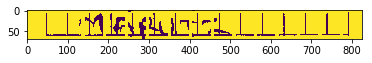

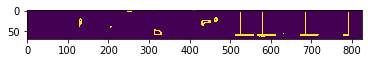

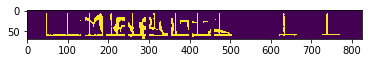

IUBYUHWWTJZ LL
89418971_WithoutGrid


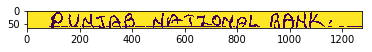

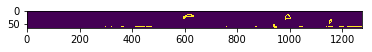

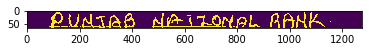

EYBBBNO UHK
89418971_WithoutGrid


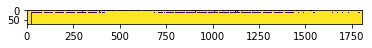

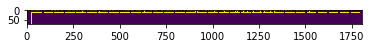

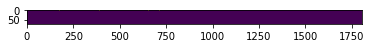


89418971_WithoutGrid


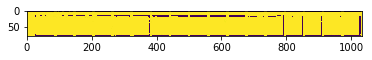

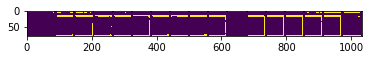

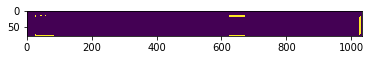

I IJ
89418971_WithoutGrid


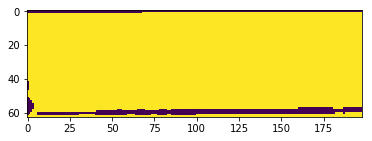

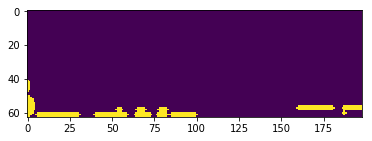

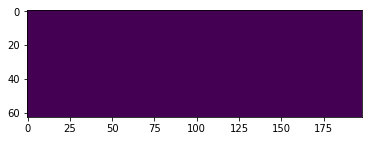


89418971_WithoutGrid


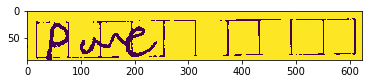

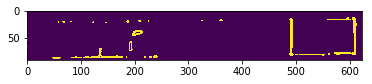

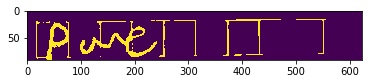

BMJII I
89418971_WithoutGrid


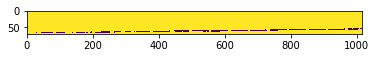

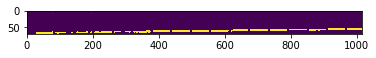

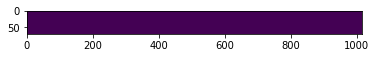


89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
89418971_WithoutGrid
OG-19-2001-1801-00001530_WithoutGrid
OG-19-2001-1801-00001530_WithoutGrid
OG-19-2001-1801-00001530_WithoutGrid
OG-19-2001-1801-00001530_WithoutGrid
OG-19-2001-1801-00001530_WithoutGrid
OG-19-2001-1801-00001530_WithoutGrid
OG-19-2001-1801-00001530_WithoutGrid
OG-19-2001-1801-00001530_WithoutGrid
OG-19-2001-1801-00001530_WithoutGrid
OG-19-2001-1801-00001530_WithoutGrid
OG-19-2001-1801-00001530_WithoutGrid
OG-19-2001-1801-00001530_WithoutGrid
OG-19-2001-1801-00001530_WithoutGrid
OG-19-2001-1801-00001530_WithoutGrid
OG-19-2001-1801-00001530_WithoutGrid
OG-19-2001-1801-00001530_WithoutGrid
OG-19-2001-1801-00001530_WithoutGrid


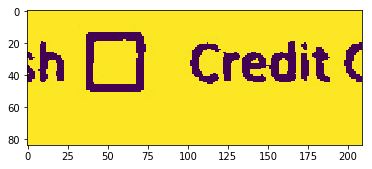

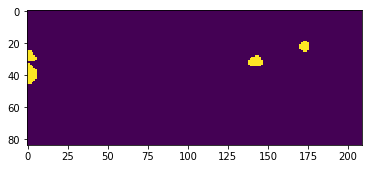

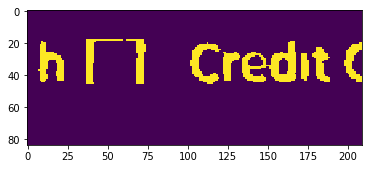

DJ
OG-19-2001-1801-00001530_WithoutGrid


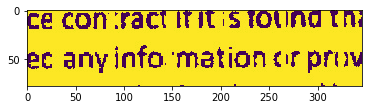

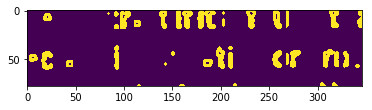

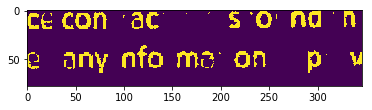


OG-19-2001-1801-00001530_WithoutGrid


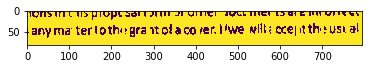

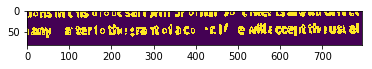

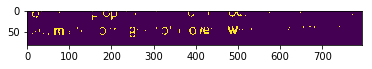


OG-19-2001-1801-00001530_WithoutGrid


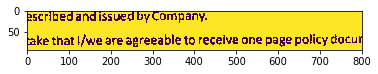

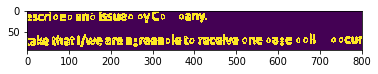

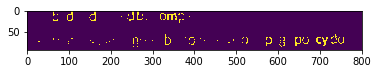


OG-19-2001-1801-00001530_WithoutGrid


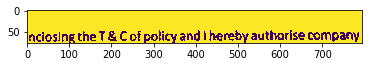

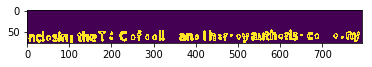

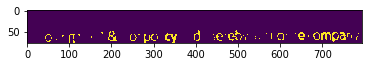


OG-19-2001-1801-00001530_WithoutGrid


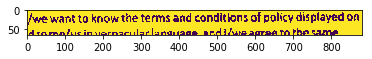

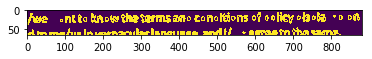

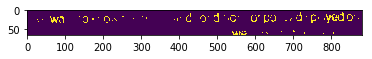

M
OG-19-2001-1801-00001530_WithoutGrid


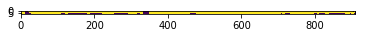

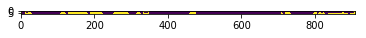

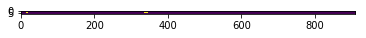


OG-19-2001-1801-00001530_WithoutGrid


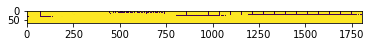

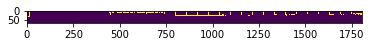

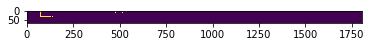


OG-19-2001-1801-00001530_WithoutGrid


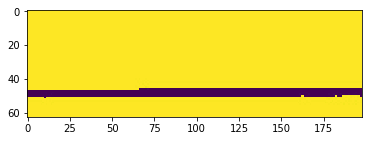

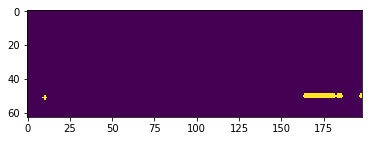

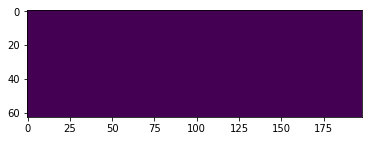


OG-19-2001-1801-00001530_WithoutGrid


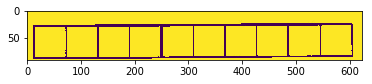

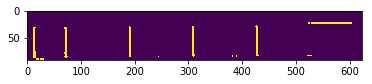

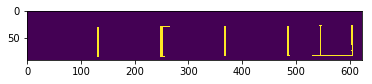

I DJJI
OG-19-2001-1801-00001530_WithoutGrid


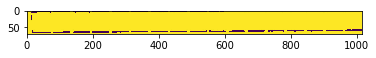

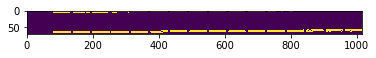

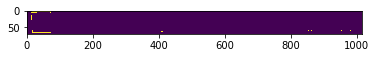

I
OG-19-2001-1801-00001530_WithoutGrid


In [791]:
for image_path in glob.glob(os.path.join('/home/Sandeep/','*/*/*/*.jpg')):
    fname=image_path.split('/')[4].split('.')[0]
    print(fname)
    bname=image_path.split('/')[5].split('.')[0]
    if  bname=='Character':
        print(character_extraction(image_path, dico, model_char))

# Contours Replacement

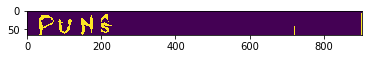

[28, 79, 140, 193]
[28, 79, 140, 193, 242]


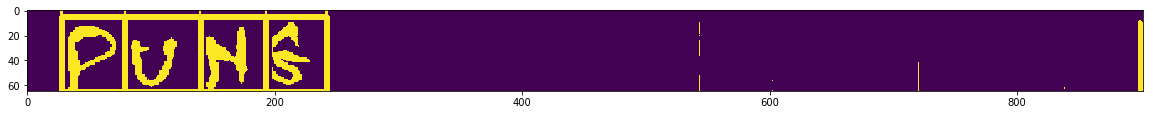

rect2 (5,)


TypeError: 'int' object is not subscriptable

In [672]:
from PIL import Image
import numpy as np

img=cv2.imread('/home/Sandeep/Without_Grid/89272212_WithoutGrid/Character/City.jpg',0)
overlay=cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
overlay=overlay[:65,10:]
plt.imshow(overlay);plt.show()
cv2.imwrite('/home/Sandeep/something4.jpg',overlay)
a = []
b = []
c=[]
# for i in range(overlay.shape[1]-8):
count = 0

# for i in range(overlay.shape[1]-10):
#         if np.any(overlay[:,i+10])==255:
#             count = count + 1
#         if count > 50:
#             a.append(i)

for i in range(overlay.shape[1]):
    count = 0
    try:
        for k in range(1,5):
            #if np.any(overlay[:,i+k])==np.any(np.zeros((53,),dtype=int)) :
            if np.any(overlay[:,i+k]>0.08*100)==0 :
                count = count + 1
            if count > 3:
                a.append(i)
    except:
        pass

#print("a", a)
t=0
if len(a)!=0:
    for i in range(len(a)-1):
        if a[i+1]-a[i]>=26:
            b.append(a[i])
    b.sort()
    count = 0
    print(b)
    for s in range(b[-1],overlay.shape[1]):
        c.append(s)
    for k in range(len(c)-1):
        try:
            if c[k+1]-c[k]>=1:
                count = count + 1
            if count >= 50:
                b.append(c[k])
                break
        except:
            pass
    print(b)
    temp = 0
    for i,each in enumerate(b):
        try:
#             temp = temp + eachlen(a)
#             print(temp)
            overlay[:,each-1:each+1] = np.ones((overlay.shape[0],2), dtype=int)*255
            cv2.rectangle(overlay,(each,5),(b[i+1],65),(255,0,0),3)
        except:
            pass
cv2.imwrite('/home/Sandeep/something3.jpg', overlay)
plt.figure(figsize=(20,20))
plt.imshow(overlay)
plt.show()
# Making it into an ARRAY
rect2 = np.array(b, 'int')
#print("rect2", rect2.shape)
col = 0

# Sorting the list

try:
    rect2 = rect2[np.argsort(rect2[:,col])]
except IndexError:
    rect2 = b




#print(rect2)
li = []
s=""
#         plt.imshow(rect2)
#         plt.show()
O_copy = img.copy()
OriImg2=img.copy()
d={}
cnt = 0

# For drawing the rectangle 

for j,rect in enumerate(rect2):
    roi=OriImg2[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]
#             plt.imshow(newroi)
#             plt.show()
    a_str=''
    if roi.shape[0] >= 28 and roi.shape[1] >= 28:
        roi = cv2.resize(roi, (28, 28), cv2.INTER_AREA)
        newroi = cv2.resize(newroi, (28, 28), cv2.INTER_AREA)
        plt.imshow(roi)
        plt.show()
#                 plt.imshow(newroi)
#                 plt.show()
        ret1, im_th1 = cv2.threshold(roi, 190, 255, cv2.THRESH_BINARY)
        img = im_th1.astype('float32')
        img = resize(img, (28,28), order=1, preserve_range=True)
        img = img/255
        img = resize(ones_padding(img), (28,28), order=1, preserve_range=True)
        img = img.reshape((1,28,28,1))

        a_str = model_char.predict_classes(img)
        #print('str',a_str)
        a_str = string.ascii_uppercase[a_str[0]]
        #print(a_str)
        d[cnt] = rect[0]
        cnt=cnt+1
#             print('d', d)
    s += str(a_str)
x = list(d.values())
if (len(x)>=3):
    y=[x[i+1]-x[i] for i in range(len(x)-1)]
    s1 = s[0:(np.argmax(y)+1)]+' '+s[(np.argmax(y)+1):]    
else:
    s1 = s
return s1
#print(a)
#print(b)

In [580]:
b[-1]

381

In [365]:
for k in range(1,80):
    if a[k+1]-a[k]==1:
        each(a[k])

IndexError: list index out of range

In [303]:
np.zeros((53,),dtype=uint8)

NameError: name 'uint8' is not defined

In [185]:
import inquirer
questions = [
  inquirer.List('size',
                message="What size do you need?",
                choices=['Jumbo', 'Large', 'Standard', 'Medium', 'Small', 'Micro'],
            ),
]
answers = inquirer.prompt(questions)


ModuleNotFoundError: No module named 'inquirer'

In [140]:
overlay[36,10]

0

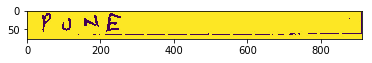

NameError: name 'y' is not defined

In [28]:
from PIL import Image
import numpy as np

img=cv2.imread('/home/Sandeep/something1.jpg',0)
plt.imshow(img);plt.show()
thresh=cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
for i in range(thresh.shape[0]):
     for j in range(thresh.shape[1]):
            #data = np.zeros((i, j, 3), dtype=np.uint8)
            img[y, x] = 255 if img[y, x] >= T else 0
            


In [240]:
from PIL import Image
import numpy as np

w, h = 512, 512
data = np.zeros((h, w, 3), dtype=np.uint8)
data[256, 256] = [255, 0, 0]
img = Image.fromarray(data, 'RGB')
img.save('my.png')
img.show()

0 1
1 2
2 3


In [4]:
model_char = load_model("/KALpydev/icr_pickle_files/CNN_Model/Character/CNN_Model_v2.h5")
with open("/KALpydev/icr_pickle_files/dictionary.p","rb") as f: 
        V, dico = pickle.load(f, encoding='latin1')

In [5]:
def ones_padding(x):
    y=np.ones([32,32])
    y[2:30,2:30]=x
    return(y)

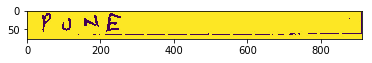

912
137


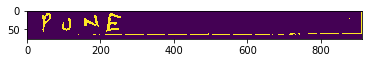

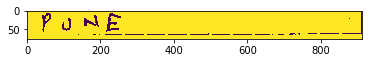

[array([[[746,  63]],

       [[746,  65]]], dtype=int32), array([[[730,  63]],

       [[730,  65]]], dtype=int32), array([[[684,  63]],

       [[684,  65]],

       [[699,  65]],

       [[699,  63]]], dtype=int32), array([[[680,  63]],

       [[680,  65]]], dtype=int32), array([[[666,  63]],

       [[666,  65]],

       [[670,  65]],

       [[670,  63]]], dtype=int32), array([[[621,  63]],

       [[621,  65]],

       [[661,  65]],

       [[661,  63]]], dtype=int32), array([[[562,  63]],

       [[562,  65]],

       [[612,  65]],

       [[612,  63]]], dtype=int32), array([[[503,  63]],

       [[503,  65]],

       [[553,  65]],

       [[553,  63]]], dtype=int32), array([[[385,  63]],

       [[385,  65]],

       [[435,  65]],

       [[435,  63]]], dtype=int32), array([[[326,  63]],

       [[326,  65]],

       [[376,  65]],

       [[376,  63]]], dtype=int32), array([[[267,  63]],

       [[267,  65]],

       [[317,  65]],

       [[317,  63]]], dtype=int32), array([[[

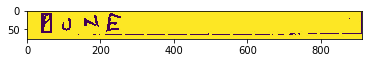

56 5 24


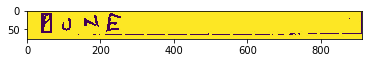

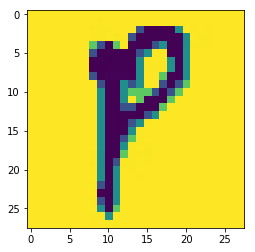

str [15]


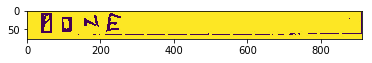

40 17 88


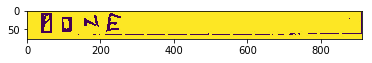

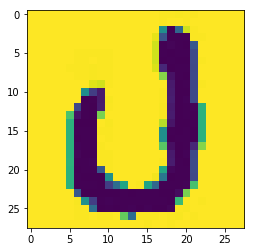

str [20]


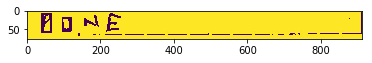

3 63 139


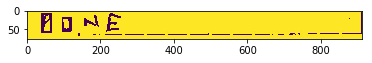

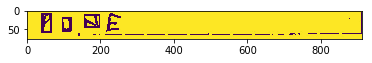

35 11 159


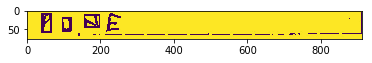

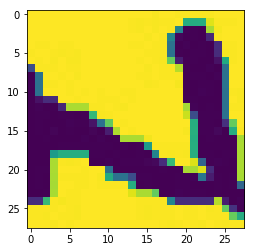

str [13]


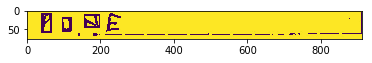

3 63 184


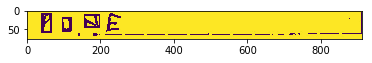

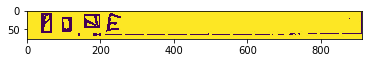

3 63 196


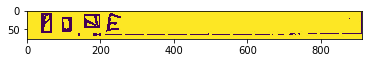

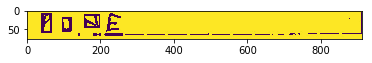

3 63 234


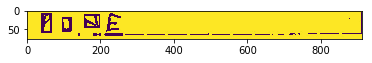

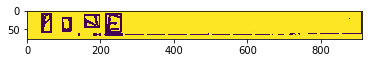

56 5 206


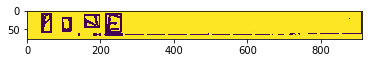

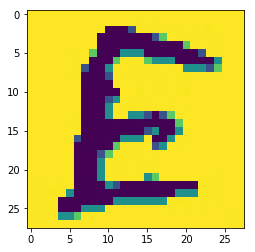

str [4]


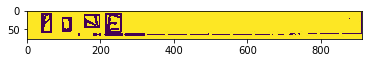

3 63 291


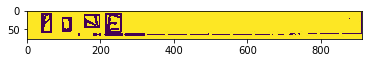

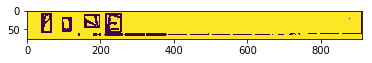

3 63 350


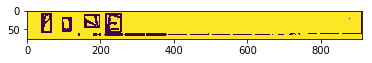

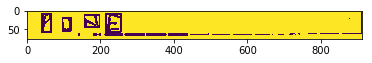

3 63 409


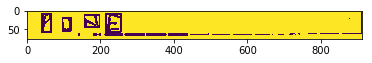

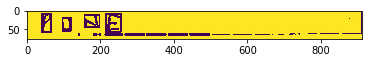

4 62 467


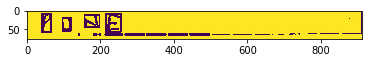

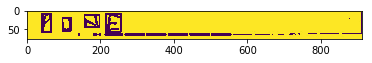

3 63 527


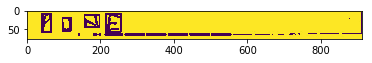

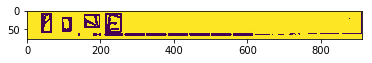

3 63 586


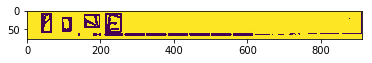

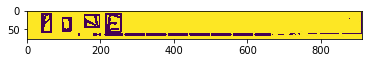

3 63 640


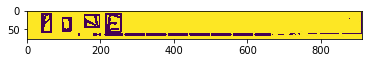

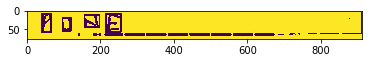

3 63 667


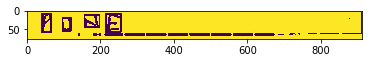

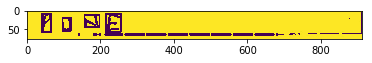

3 63 679


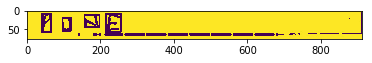

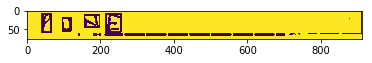

3 63 691


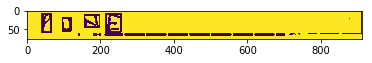

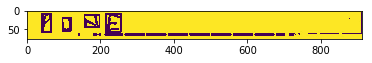

4 62 717


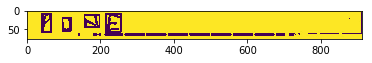

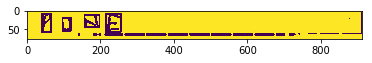

3 62 725


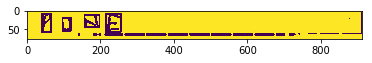

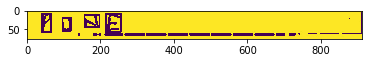

3 62 727


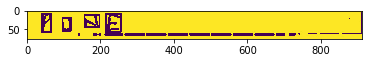

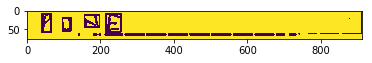

3 63 729


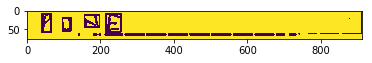

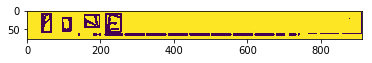

3 62 738


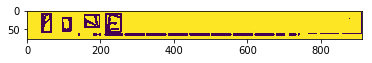

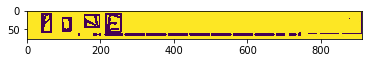

5 61 740


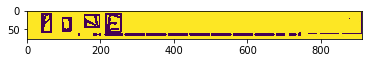

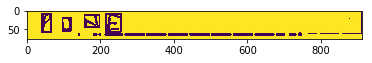

3 63 745


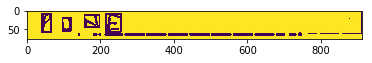

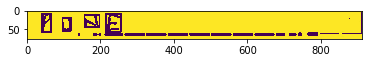

4 61 775


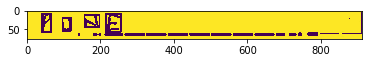

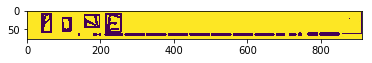

4 61 821


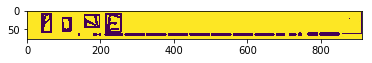

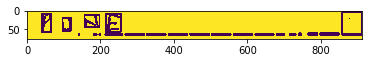

69 1 850


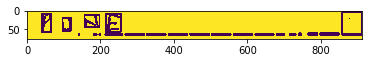

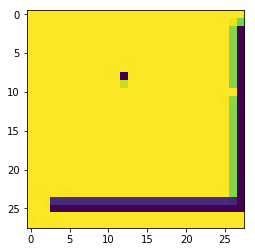

str [11]


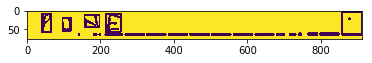

3 21 876


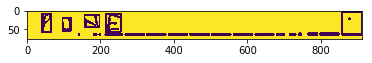

'PUNE L'

In [6]:
character_extraction('/home/Sandeep/something1.jpg', dico, model_char)

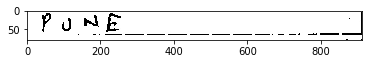

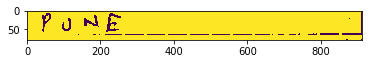

In [23]:
im = cv2.imread('/home/Sandeep/something1.jpg')
plt.imshow(im)
plt.show()
gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()
ref = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY_INV)[1]
contours,hierarchy,_ = cv2.findContours(ref,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
idx = 0
for cnt in contours:

        xe,ye,we,he = cv2.boundingRect(cnt)
        #print(xe)
        roi=im[ye-100:ye+he+100,xe-100:xe+we+100]

        if xe > 30:
                if ye > 30:
                        if he > 30:
                                if we > 30:
                                        idx += 1
                                        cv2.imwrite(str(idx) + '.jpg', roi)
                                        cv2.rectangle(im,(xe,ye),(xe+we,ye+he),(200,0,0),2)
                                        cv2.imwrite('/home/Sandeep/dm.jpg', im)

In [ ]:
import cv2
import numpy as np
im = cv2.imread('/home/Sandeep/something1.jpg',0)
ret,thresh1 = cv2.threshold(im,127,255,cv2.THRESH_BINARY)
_,contours, hierarchy = cv2.findContours(thresh1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    #bound the images
    cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),3)
i=0
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    #following if statement is to ignore the noises and save the images which are of normal size(character)
    #In order to write more general code, than specifying the dimensions as 100,
    # number of characters should be divided by word dimension
    if w>100 and h>100:
        #save individual images
        cv2.imwrite(str(i)+".jpg",thresh1[y:y+h,x:x+w])
        i=i+1
cv2.namedWindow('BindingBox', cv2.WINDOW_NORMAL)
cv2.imshow('BindingBox',im)

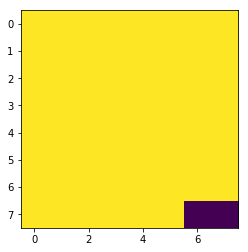

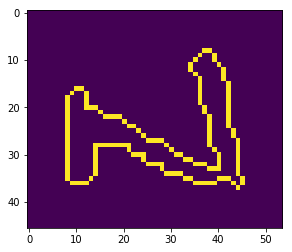

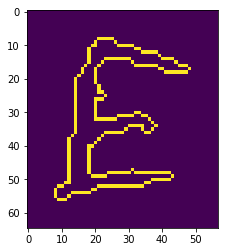

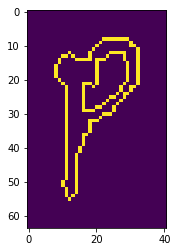

In [34]:
im = cv2.imread('/home/Sandeep/something1.jpg')
gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
#kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
#blackhat = cv2.morphologyEx(gray,cv2.MORPH_BLACKHAT,kernel)
_,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)
thresh = cv2.dilate(thresh,None)
_,cnts,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
avgCntArea = np.mean([cv2.contourArea(k) for k in cnts])
digits = []
boxes = []
for (i,c) in enumerate(cnts):
    if cv2.contourArea(c)<avgCntArea/10:
        continue
    mask = np.zeros(gray.shape,dtype="uint8")
    (x,y,w,h) = cv2.boundingRect(c)
    
    cv2.drawContours(mask,[c],-1,255,-1)
    mask = cv2.bitwise_and(thresh,thresh,mask=mask)
    digit = mask[y-8:y+h+8,x-8:x+w+8]
    #digit = cv2.resize(digit,(28,28))
    plt.imshow(digit)
    plt.show()
    boxes.append((x,y,w,h))
    digits.append(digit)

# New Logic

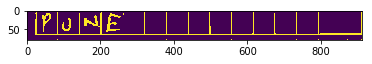

a []


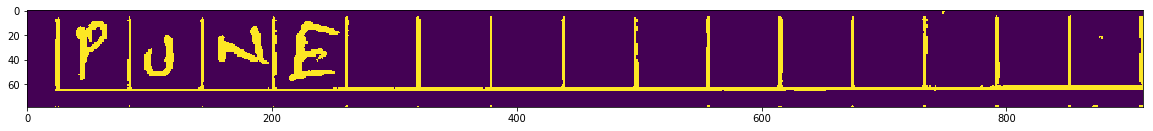

In [840]:
from PIL import Image
import numpy as np

img=cv2.imread('/KALpydev/new_Cropped/88103994/Character/City.jpg',0)
for i in img[:,23]:
    if i==0:
        True
#print(img.shape)
overlay=cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
#overlay=overlay[:65,10:]
plt.imshow(overlay);plt.show()

#cv2.imwrite('/home/Sandeep/something4.jpg',overlay)
a = []
b = []
c=[]
# for i in range(overlay.shape[1]-8):
count = 0

# for i in range(overlay.shape[1]-10):
#         if np.any(overlay[:,i+10])==255:
#             count = count + 1
#         if count > 50:
#             a.append(i)

for i in range(overlay.shape[1]):
    count = 0
    try:
        for k in range(1,5):
            #if np.any(overlay[:,i+k])==np.any(np.zeros((53,),dtype=int)) :
            if overlay[:,i+k]==0 :
                count = count + 1
            if count > 5:
                a.append(i)
    except:
        pass

print("a", a)
t=0
if len(a)!=0:
    for i in range(len(a)-1):
        if a[i+1]-a[i]>=26:
            b.append(a[i])
    b.sort()
    for i,each in enumerate(b):
        try:
            img[:,each-1:each+1] = np.ones((overlay.shape[0],2), dtype=int)*255
        except:
            pass
plt.figure(figsize=(20,20))
plt.imshow(overlay)
plt.show()